# Qualitative comparison of the elemental abundance ratios of the bar, inner disc, and knot given the GMM fit in L

In [29]:
# new less restrictive sample selection
# create the parent mask
# mask = (data['SNR']>50)&(data['LOGG']<3.)&(data['LOGG']>0.)&(data['TEFF']>3500.)&(data['TEFF']<5500.)&(data['ASPCAPFLAG']==0)\
#     &(data['weighted_dist']/data['weighted_dist_error']>10)&(data['EXTRATARG']==0)&(mask_gcs==False) & (mask_gcs2==False)\
#     &(rads<5)&(data['age']>0)&(data['age']<14)&(data['LOGG_ERR']<0.2)&(data['fakemag']<500)

mask = (data['SNR']>50)&(data['LOGG']<3.)&(data['LOGG']>0.)&(data['TEFF']>3500.)&(data['TEFF']<5500.)\
    &(data['weighted_dist']/data['weighted_dist_error']>10)&(data['EXTRATARG']==0)&(mask_gcs==False) & (mask_gcs2==False)\
    &(rads<5)&(data['LOGG_ERR']<0.2)&(data['FE_H']>-0.4)

# print('There are '+str(len(data[mask]))+' stars in the parent sample')

# np.savetxt('/Users/dhortadarrington/Desktop/new_inner_gal_sample',data['APOGEE_ID_1'][mask],fmt='%s')

In [30]:
print(len(data[mask])) #18994
print(len(data[mask])) #21460

21460
21460


In [11]:
# LOAD THE DATA FOR THE GC LIST IN APOGEE
path = '/Users/dhortadarrington/Documents/Master/data/'
file = 'GC_catalogo_14_mayo.fits'
# file = 'GC_DR16plus_nofeh.fits'

tb2 = fits.open(path+file)
data2 = tb2[1].data
gc_star_ids = data2.field('APOGEE_ID')
print('There are '+str(len(gc_star_ids))+' GC stars')

# LOAD THE DATA FOR THE GC LIST IN APOGEE
path = '/Users/dhortadarrington/Documents/Master/data/'
file = 'GC_members_VAC.fits'
# file = 'GC_DR16plus_nofeh.fits'

tb3 = fits.open(path+file)
data3 = tb3[1].data
gc_star_ids_RPS = data3.field('APOGEE_ID')
print('There are '+str(len(gc_star_ids_RPS))+' GC stars')

There are 7562 GC stars
There are 7260 GC stars


In [13]:
apo_id = data['APOGEE_ID_1']
# Clean the initial data
mask_gcs = np.isin(list(apo_id),list(gc_star_ids))
mask_gcs2 = np.isin(list(apo_id),list(gc_star_ids_RPS))

In [14]:
from astropy.io import fits

path = '/Users/dhortadarrington/Documents/Master/data/dr17_dr3_McMillan_astroNN_rev1.fits'
tb = fits.open(path)
data = tb[1].data 

In [5]:
import numpy as np
rgal = data['Rgal']*8.178
zgal = data['Zgal']*8.178

rads = np.sqrt(rgal**2+zgal**2)

In [8]:
# new less restrictive sample selection
# create the parent mask
mask = (data['SNR']>50)&(data['LOGG']<3.)&(data['LOGG']>0.)&(data['TEFF']>3500.)&(data['TEFF']<5500.)&(data['ASPCAPFLAG']==0)\
    &(data['weighted_dist']/data['weighted_dist_error']>10)&(data['EXTRATARG']==0)\
    &(rads<5)&(data['age']>0)&(data['age']<14)&(data['LOGG_ERR']<0.2)
print(len(data[mask]))

# 2506

25064


In [ ]:
# more conservative sample selection
# # create the parent mask
# mask = (data['SNR']>100)&(data['LOGG']<3.)&(data['LOGG']>1.)&(data['TEFF']>3500.)&(data['TEFF']<5500.)&(data['ASPCAPFLAG']==0)\
#     &(data['weighted_dist']/data['weighted_dist_error']>10)&(data['EXTRATARG']==0)&(mask_gcs==False) & (mask_gcs2==False)\
#     &(rads<5)&(data['age']>0)&(data['age']<14)

# print('There are '+str(len(data[mask]))+' stars in the parent sample')

# np.savetxt('/Users/dhortadarrington/Desktop/new_inner_gal_sample',data['APOGEE_ID_1'][mask],fmt='%s')

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from astropy.io import fits
import tqdm
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
import nmmn.plots
import vorbin
wolfram=nmmn.plots.wolframcmap() # for Mathematica's cmap
parula=nmmn.plots.parulacmap() # for MATLAB's cmap
turbo=nmmn.plots.turbocmap() # Turbo
import warnings
warnings.filterwarnings('ignore')

In [2]:
# LOAD THE DATA
# this is the latest APOGEE catalogue that APW sent me with orbital properties determined using StarHorse distances
path = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/bar-prob-big.fits'
tb = fits.open(path)
data = tb[1].data 


In [4]:
mask_knot = data['Knot_Probability']>0.8
mask_bar = data['Bar_Probability']>0.8
mask_disc = data['Disc_Probability']>0.8

In [6]:
from scipy import stats

bin_feh = np.linspace(np.min(data['FE_H']),np.max(data['FE_H']),100)
bin_mgfe = np.linspace(np.min(data['MG_FE']),np.max(data['MG_FE']),100)

hist = stats.binned_statistic_2d(data['FE_H'],data['MG_FE'], data['Knot_Probability'], statistic='mean', bins=[bin_feh,bin_mgfe])
vz_c = 0.5 * (hist.x_edge[:-1] + hist.x_edge[1:])
z_c = 0.5 * (hist.y_edge[:-1] + hist.y_edge[1:])
mesh_feh, mesh_mgfe = np.meshgrid(vz_c,z_c)
metric = hist[0].T

hist2 = stats.binned_statistic_2d(data['FE_H'],data['MG_FE'], data['Bar_Probability'], statistic='mean', bins=[bin_feh,bin_mgfe])
vz_c2 = 0.5 * (hist2.x_edge[:-1] + hist2.x_edge[1:])
z_c2 = 0.5 * (hist2.y_edge[:-1] + hist2.y_edge[1:])
mesh_feh2, mesh_mgfe2 = np.meshgrid(vz_c2,z_c2)
metric2 = hist2[0].T

hist3 = stats.binned_statistic_2d(data['FE_H'],data['MG_FE'], data['Disc_Probability'], statistic='mean', bins=[bin_feh,bin_mgfe])
vz_c3 = 0.5 * (hist3.x_edge[:-1] + hist3.x_edge[1:])
z_c3 = 0.5 * (hist3.y_edge[:-1] + hist3.y_edge[1:])
mesh_feh3, mesh_mgfe3 = np.meshgrid(vz_c3,z_c3)
metric3 = hist3[0].T


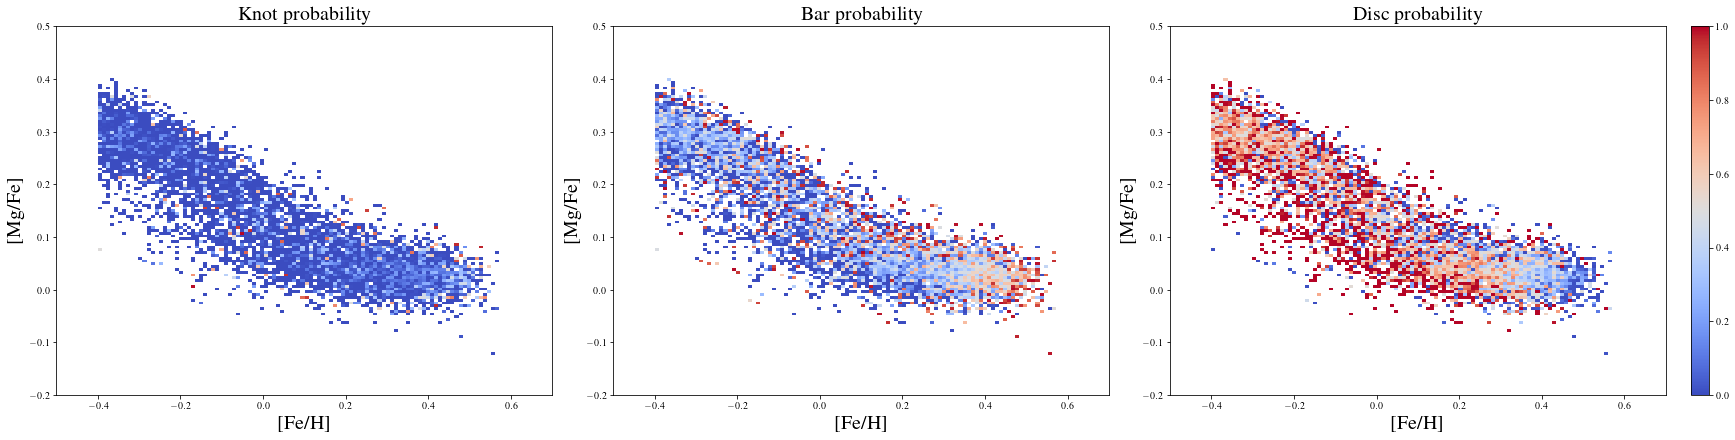

In [7]:
from matplotlib.colors import LogNorm

fig = plt.figure(constrained_layout=True,figsize=(24,6))


plt.subplot(1,3,1)
plt.title('Knot probability',fontsize=20)
plt.pcolormesh(mesh_feh,mesh_mgfe,metric,cmap='coolwarm',vmin=0.,vmax=1)
plt.xlabel('[Fe/H]',fontsize=20)
plt.ylabel('[Mg/Fe]',fontsize=20)
plt.xlim(-0.5,0.7)
plt.ylim(-0.2,0.5)

plt.subplot(1,3,2)
plt.title('Bar probability',fontsize=20)
plt.pcolormesh(mesh_feh2,mesh_mgfe2,metric2,cmap='coolwarm',vmin=0.,vmax=1)
plt.xlabel('[Fe/H]',fontsize=20)
plt.ylabel('[Mg/Fe]',fontsize=20)
plt.xlim(-0.5,0.7)
plt.ylim(-0.2,0.5)

plt.subplot(1,3,3)
plt.title('Disc probability',fontsize=20)
plt.pcolormesh(mesh_feh3,mesh_mgfe3,metric3,cmap='coolwarm',vmin=0.,vmax=1)
plt.xlabel('[Fe/H]',fontsize=20)
plt.ylabel('[Mg/Fe]',fontsize=20)
plt.xlim(-0.5,0.7)
plt.ylim(-0.2,0.5)

plt.colorbar()

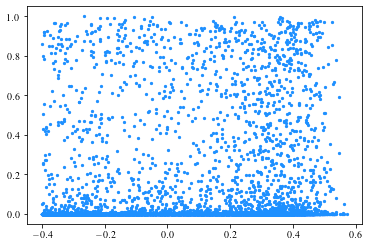

In [8]:
plt.scatter(data['FE_H'],data['Knot_Probability'],s=5,c='dodgerblue')


Text(0, 0.5, 'Disc prob')

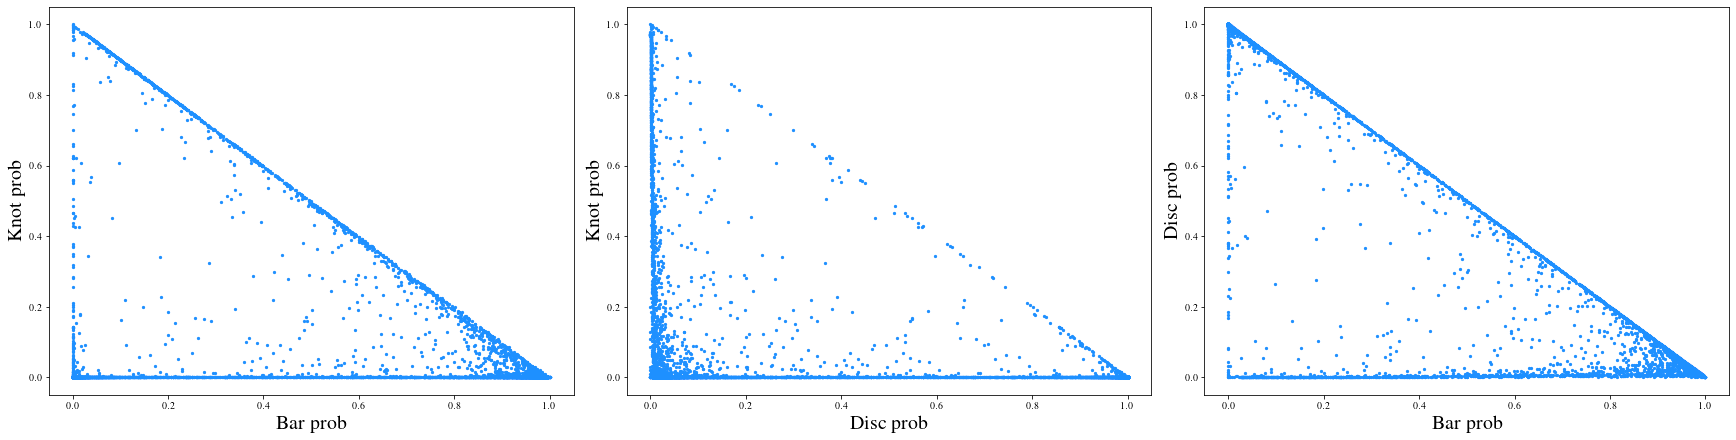

In [11]:
fig = plt.figure(constrained_layout=True,figsize=(24,6))

plt.subplot(1,3,1)
plt.scatter(data['Bar_Probability'],data['Knot_Probability'],s=5,c='dodgerblue')
plt.xlabel('Bar prob',fontsize=20)
plt.ylabel('Knot prob',fontsize=20)

plt.subplot(1,3,2)
plt.scatter(data['Disc_Probability'],data['Knot_Probability'],s=5,c='dodgerblue')
plt.xlabel('Disc prob',fontsize=20)
plt.ylabel('Knot prob',fontsize=20)

plt.subplot(1,3,3)
plt.scatter(data['Bar_Probability'],data['Disc_Probability'],s=5,c='dodgerblue')
plt.xlabel('Bar prob',fontsize=20)
plt.ylabel('Disc prob',fontsize=20)


# Check the MDFs and abundances

(0.0, 2.5)

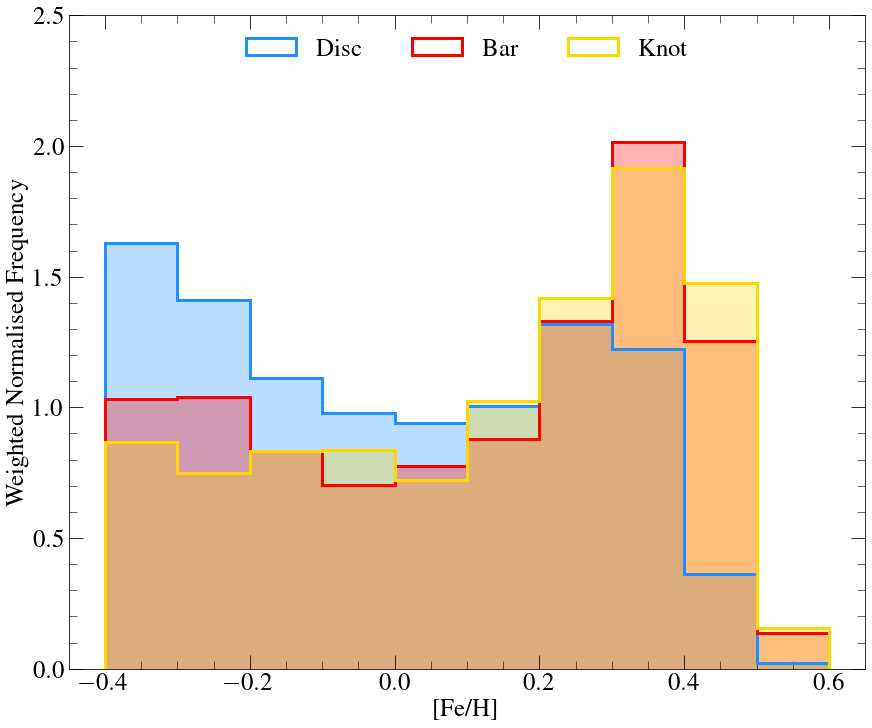

In [12]:
bins_feh = np.linspace(-0.4,0.6,11)

fig = plt.figure(constrained_layout=True,figsize=(12,10))

# plt.hist(data['FE_H'],bins_feh,color='k',alpha=0.3,density=True)
# plt.hist(data['FE_H'],bins_feh,color='k',histtype='step',lw=3,density=True,label='all')

plt.hist(data['FE_H'],bins_feh,color='dodgerblue',alpha=0.3,density=True,weights=data['Disc_Probability'])
plt.hist(data['FE_H'],bins_feh,color='dodgerblue',histtype='step',lw=3,density=True,label='Disc',weights=data['Disc_Probability'])

plt.hist(data['FE_H'],bins_feh,color='r',alpha=0.3,density=True,weights=data['Bar_Probability'])
plt.hist(data['FE_H'],bins_feh,color='r',histtype='step',lw=3,density=True,label='Bar',weights=data['Bar_Probability'])

plt.hist(data['FE_H'],bins_feh,color='gold',alpha=0.3,density=True,weights=data['Knot_Probability'])
plt.hist(data['FE_H'],bins_feh,color='gold',histtype='step',lw=3,density=True,label='Knot',weights=data['Knot_Probability'])

plt.xlabel('[Fe/H]',fontsize=25)
plt.ylabel('Weighted Normalised Frequency',fontsize=25)
plt.legend(loc='upper center',frameon=False,fontsize=25,ncol=3)

plt.tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
plt.tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()
plt.ylim(0,2.5)


In [13]:
# run a ks test on the MDFs of the three samples

from scipy import stats

mdf_knot, bin_edges_knot = np.histogram(data['FE_H'],bins= bins_feh,weights=data['Knot_Probability'])
mdf_bar, bin_edges_bar = np.histogram(data['FE_H'],bins= bins_feh,weights=data['Bar_Probability'])
mdf_disc, bin_edges_disc = np.histogram(data['FE_H'],bins= bins_feh,weights=data['Disc_Probability'])

knot_bar_ks = stats.ks_2samp(mdf_knot,mdf_bar)
knot_disc_ks = stats.ks_2samp(mdf_knot,mdf_disc)
disc_bar_ks = stats.ks_2samp(mdf_disc,mdf_bar)



In [14]:
print(knot_bar_ks)
print(knot_disc_ks)
print(disc_bar_ks)
# KS results and p-value suggest they are all different!

KstestResult(statistic=0.9, pvalue=0.00021650176448938054)
KstestResult(statistic=0.9, pvalue=0.00021650176448938054)
KstestResult(statistic=0.7, pvalue=0.012340600575894691)


In [15]:
knot_bar_ks2 = stats.ks_2samp(data['FE_H'][mask_knot],data['FE_H'][mask_bar])
knot_disc_ks2 = stats.ks_2samp(data['FE_H'][mask_knot],data['FE_H'][mask_disc])
disc_bar_ks2 = stats.ks_2samp(data['FE_H'][mask_disc],data['FE_H'][mask_bar])

In [16]:
print(knot_bar_ks2)
print(knot_disc_ks2)
print(disc_bar_ks2)

KstestResult(statistic=0.04350974432326122, pvalue=0.6266574480485411)
KstestResult(statistic=0.209544403929854, pvalue=2.330691195595591e-12)
KstestResult(statistic=0.21298420154510686, pvalue=1.2212453270876722e-15)


There is either metallicity gradients in the MW's bar, or the knot is the most metal-rich bit of the Bar?

In [17]:
knot_bar_ks2 = stats.ks_2samp(data['FE_H'][mask_knot],data['FE_H'][mask_bar2])
knot_disc_ks2 = stats.ks_2samp(data['FE_H'][mask_knot],data['FE_H'][mask_disc2])
disc_bar_ks2 = stats.ks_2samp(data['FE_H'][mask_disc],data['FE_H'][mask_bar2])

NameError: name 'mask_bar2' is not defined

In [23]:
print(knot_bar_ks2)
print(knot_disc_ks2)
print(disc_bar_ks2)

KstestResult(statistic=0.1405675707719883, pvalue=0.019658261289612344)
KstestResult(statistic=0.3116704606237017, pvalue=6.292244503214306e-11)
KstestResult(statistic=0.2675494801766299, pvalue=2.0688976898944525e-49)


# Do the same for ages

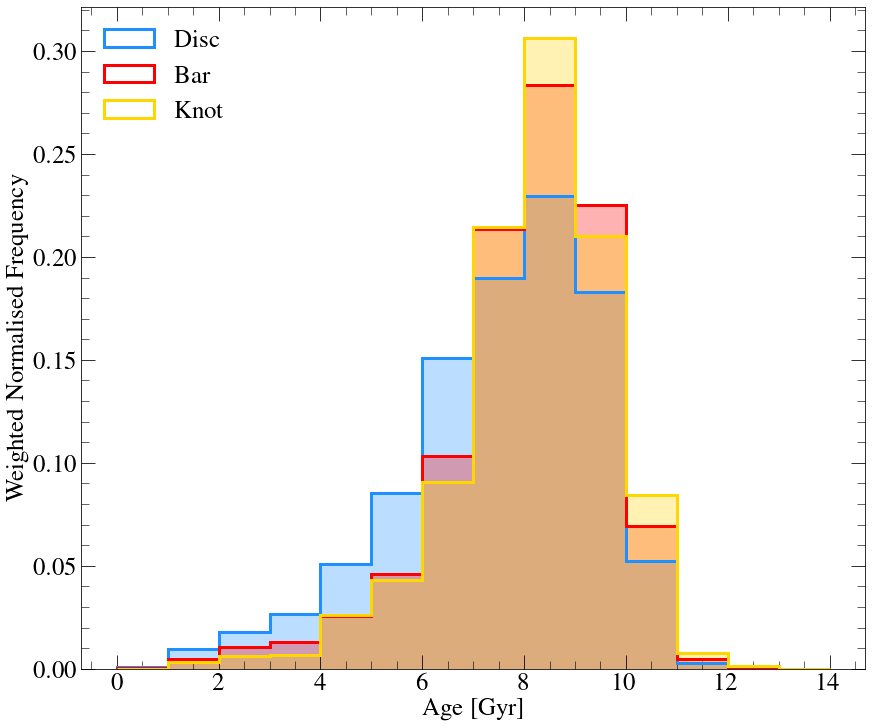

In [18]:
bins_feh = np.linspace(0,14,15)

fig = plt.figure(constrained_layout=True,figsize=(12,10))

# plt.hist(data['FE_H'],bins_feh,color='k',alpha=0.3,density=True)
# plt.hist(data['FE_H'],bins_feh,color='k',histtype='step',lw=3,density=True,label='all')

plt.hist(data['age_lowess_correct'],bins_feh,color='dodgerblue',alpha=0.3,density=True,weights=data['Disc_Probability'])
plt.hist(data['age_lowess_correct'],bins_feh,color='dodgerblue',histtype='step',lw=3,density=True,label='Disc',weights=data['Disc_Probability'])

plt.hist(data['age_lowess_correct'],bins_feh,color='r',alpha=0.3,density=True,weights=data['Bar_Probability'])
plt.hist(data['age_lowess_correct'],bins_feh,color='r',histtype='step',lw=3,density=True,label='Bar',weights=data['Bar_Probability'])

plt.hist(data['age_lowess_correct'],bins_feh,color='gold',alpha=0.3,density=True,weights=data['Knot_Probability'])
plt.hist(data['age_lowess_correct'],bins_feh,color='gold',histtype='step',lw=3,density=True,label='Knot',weights=data['Knot_Probability'])

plt.xlabel('Age [Gyr]',fontsize=25)
plt.ylabel('Weighted Normalised Frequency',fontsize=25)
plt.legend(loc='upper left',frameon=False,fontsize=25)

plt.tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
plt.tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()
# plt.ylim(0,2.5)


In [19]:
# run a ks test on the MDFs of the three samples

from scipy import stats

age_knot, bin_edges_knot = np.histogram(data['age_lowess_correct'],bins= bins_feh,weights=data['Knot_Probability'])
age_bar, bin_edges_bar = np.histogram(data['age_lowess_correct'],bins= bins_feh,weights=data['Bar_Probability'])
age_disc, bin_edges_disc = np.histogram(data['age_lowess_correct'],bins= bins_feh,weights=data['Disc_Probability'])

knot_bar_ks = stats.ks_2samp(age_knot,age_bar)
knot_disc_ks = stats.ks_2samp(age_knot,age_disc)
disc_bar_ks = stats.ks_2samp(age_disc,age_bar)



In [20]:
print(knot_bar_ks)
print(knot_disc_ks)
print(disc_bar_ks)
# KS results and p-value suggest they are all the same!

KstestResult(statistic=0.35714285714285715, pvalue=0.3433204708275377)
KstestResult(statistic=0.5, pvalue=0.05902987790590428)
KstestResult(statistic=0.21428571428571427, pvalue=0.9205155471799703)


# And with R

In [21]:
Rgal = data['Rgal']*8.178

(0.0, 6.0)

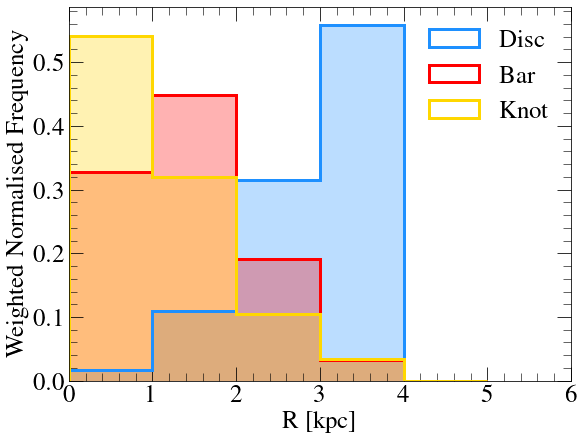

In [22]:
bins_feh = np.linspace(0,5,6)

fig = plt.figure(constrained_layout=True,figsize=(8,6))

# plt.hist(data['FE_H'],bins_feh,color='k',alpha=0.3,density=True)
# plt.hist(data['FE_H'],bins_feh,color='k',histtype='step',lw=3,density=True,label='all')

plt.hist(Rgal,bins_feh,color='dodgerblue',alpha=0.3,density=True,weights=data['Disc_Probability'])
plt.hist(Rgal,bins_feh,color='dodgerblue',histtype='step',lw=3,density=True,label='Disc',weights=data['Disc_Probability'])

plt.hist(Rgal,bins_feh,color='r',alpha=0.3,density=True,weights=data['Bar_Probability'])
plt.hist(Rgal,bins_feh,color='r',histtype='step',lw=3,density=True,label='Bar',weights=data['Bar_Probability'])

plt.hist(Rgal,bins_feh,color='gold',alpha=0.3,density=True,weights=data['Knot_Probability'])
plt.hist(Rgal,bins_feh,color='gold',histtype='step',lw=3,density=True,label='Knot',weights=data['Knot_Probability'])

plt.xlabel('R [kpc]',fontsize=25)
plt.ylabel('Weighted Normalised Frequency',fontsize=25)
plt.legend(loc='upper right',frameon=False,fontsize=25)

plt.tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
plt.tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(0,6)


In [23]:
# this speaks to me that the sole differences in MDF are caused by differences in R, and that all this is low-alpha disc

# Get the weighted Kiel diagram

In [24]:
teff_all = data['TEFF']
logg_all = data['LOGG']
data_all = np.array([teff_all,logg_all])

teff_knot = data['TEFF'][mask_knot]
logg_knot = data['LOGG'][mask_knot]
data_knot = np.array([teff_knot,logg_knot])

teff_bar = data['TEFF'][mask_bar]
logg_bar = data['LOGG'][mask_bar]
data_bar = np.array([teff_bar,logg_bar])

teff_disc = data['TEFF'][mask_disc]
logg_disc = data['LOGG'][mask_disc]
data_disc = np.array([teff_disc,logg_disc])


In [25]:
from scipy.stats import kde
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k_all = kde.gaussian_kde(data_all)
nbins=20
xi_all, yi_all = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_all = k_all(np.vstack([xi_all.flatten(), yi_all.flatten()]))

k_knot = kde.gaussian_kde(data_knot)
nbins=20
xi_knot, yi_knot = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_knot = k_knot(np.vstack([xi_knot.flatten(), yi_knot.flatten()]))

k_bar = kde.gaussian_kde(data_bar)
nbins=20
xi_bar, yi_bar = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_bar = k_bar(np.vstack([xi_bar.flatten(), yi_bar.flatten()]))

k_disc = kde.gaussian_kde(data_disc)
nbins=20
xi_disc, yi_disc = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_disc = k_disc(np.vstack([xi_disc.flatten(), yi_disc.flatten()]))


(3.0, 1.0)

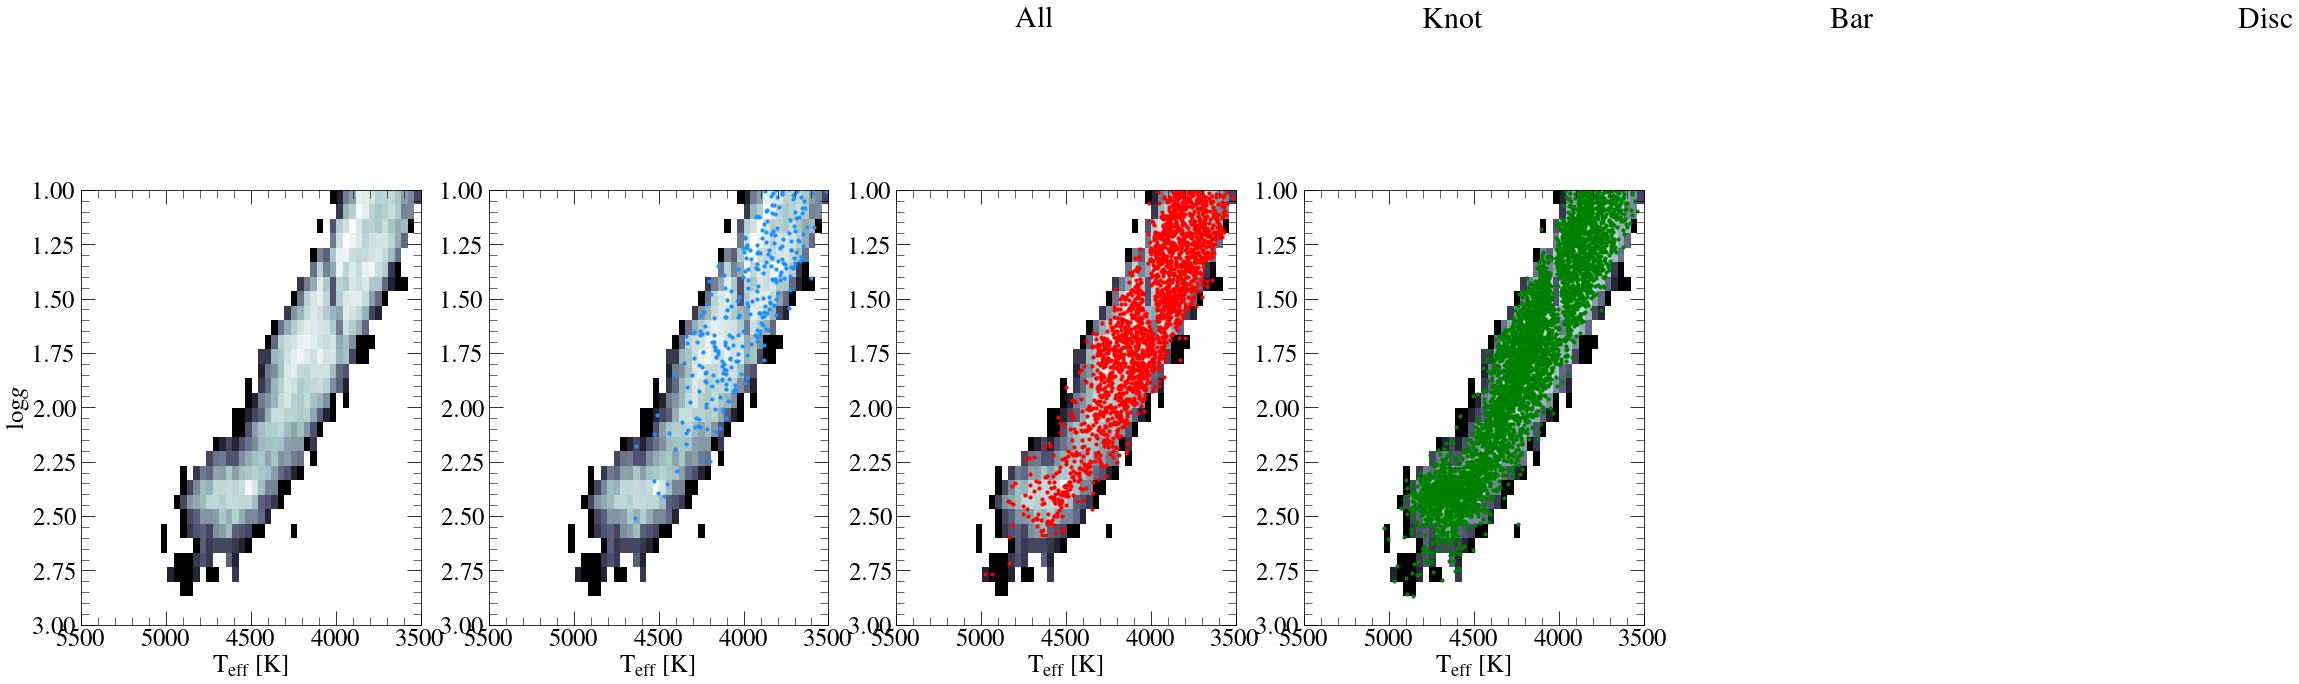

In [26]:
from matplotlib.colors import LogNorm
colores1 = ['k','dimgray','gray','silver','gainsboro','snow']
colores = ['navy','b','royalblue','dodgerblue','skyblue','cyan']
colores2 = ['maroon','r','salmon','coral','lightsalmon','peachpuff']
colores3 = ['darkgreen','g','forestgreen','limegreen','springgreen','lime']

fig, axes = plt.subplots(1, 4,figsize=(28,8),facecolor='white')


axes[0].text(0.3,0.25,'All',fontsize=30)
axes[0].hist2d(data['TEFF'],data['LOGG'],bins=40,cmap='bone',norm=LogNorm())
# color = axes[0].imshow(np.rot90(zi_all.reshape(xi_all.shape)),cmap='binary',extent=[-4,4,-4,4])
# axes[0].contour(xi_all, yi_all, zi_all.reshape(xi_all.shape),levels=6,colors=colores1,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[0].set_xlabel('T$_{\mathrm{eff}}$ [K]',fontsize=25)
axes[0].set_ylabel('log$g$',fontsize=25)
axes[0].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[0].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[0].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[0].minorticks_on()
# axes[0].colorbar(color, aspect=40)
# cax = axes[0].inset_axes([0.15, 1.08, 0.7, 0.05])
# cbar = fig.colorbar(color,ax=axes[0],cax=cax,orientation='horizontal')
# cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
# cbar.ax.tick_params(labelsize=21)
# cbar.ax.xaxis.set_ticks_position('top')
# cbar.ax.xaxis.set_label_position('top')
axes[0].set_xlim(5500,3500)
axes[0].set_ylim(3,1)

# axes[0].subplot(1,3,1)
# axes[0].title('Knot',fontsize=20)
axes[1].text(0.3,0.25,'Knot',fontsize=30)
axes[1].hist2d(data['TEFF'],data['LOGG'],bins=40,cmap='bone',norm=LogNorm())
# color = axes[1].imshow(np.rot90(zi_knot.reshape(xi_knot.shape)),cmap='Blues',extent=[-4,4,-4,4])
# axes[1].contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
axes[1].scatter(data['TEFF'][mask_knot],data['LOGG'][mask_knot],s=10,c='dodgerblue')
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[1].set_xlabel('T$_{\mathrm{eff}}$ [K]',fontsize=25)
# axes[1].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[1].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[1].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[1].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[1].minorticks_on()
# axes[0].colorbar(color, aspect=40)
# cax = axes[1].inset_axes([0.15, 1.08, 0.7, 0.05])
# cbar = fig.colorbar(color,ax=axes[1],cax=cax,orientation='horizontal')
# cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
# cbar.ax.tick_params(labelsize=21)
# cbar.ax.xaxis.set_ticks_position('top')
# cbar.ax.xaxis.set_label_position('top')
axes[1].set_xlim(5500,3500)
axes[1].set_ylim(3,1)

# axes[1].subplot(1,3,2)
# axes[1].set_title('Bar',fontsize=20)
axes[2].text(0.3,0.25,'Bar',fontsize=30)
axes[2].hist2d(data['TEFF'],data['LOGG'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
axes[2].scatter(data['TEFF'][mask_bar],data['LOGG'][mask_bar],s=10,c='r')
# color2 = axes[2].imshow(np.rot90(zi_bar.reshape(xi_bar.shape)),cmap='Reds',extent=[-4,4,-4,4])
# axes[2].contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[2].set_xlabel('T$_{\mathrm{eff}}$ [K]',fontsize=25)
# axes[2].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[2].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[2].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[2].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[2].minorticks_on()
axes[2].set_xlim(5500,3500)
axes[2].set_ylim(3,1)
# axes[1].colorbar(color2, aspect=40)
# cax = axes[2].inset_axes([0.15, 1.08, 0.7, 0.05])
# cbar = fig.colorbar(color2,ax=axes[2],cax=cax,orientation='horizontal')
# cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
# cbar.ax.tick_params(labelsize=21)
# cbar.ax.xaxis.set_ticks_position('top')
# cbar.ax.xaxis.set_label_position('top')

# axes[2].subplot(1,3,3)
# axes[2].set_title('Disc',fontsize=25)
axes[3].text(0.3,0.25,'Disc',fontsize=30)
axes[3].hist2d(data['TEFF'],data['LOGG'],bins=40,cmap='bone',norm=LogNorm())
axes[3].scatter(data['TEFF'][mask_disc],data['LOGG'][mask_disc],s=10,c='g')
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# color3 = axes[3].imshow(np.rot90(zi_disc.reshape(xi_disc.shape)),cmap='Greens',extent=[-4,4,-4,4])
# axes[3].contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
# plt.xlim(-0.6,0.6)
# plt.ylim(-0.25,0.5)
axes[3].set_xlabel('T$_{\mathrm{eff}}$ [K]',fontsize=25)
# axes[3].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[3].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[3].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[3].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[3].minorticks_on()
axes[3].set_xlim(5500,3500)
axes[3].set_ylim(3,1)

# cax = axes[3].inset_axes([0.15, 1.08, 0.7, 0.05])
# cbar = fig.colorbar(color3,ax=axes[3],cax=cax,orientation='horizontal')
# cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
# cbar.ax.tick_params(labelsize=21)
# cbar.ax.xaxis.set_ticks_position('top')
# cbar.ax.xaxis.set_label_position('top')


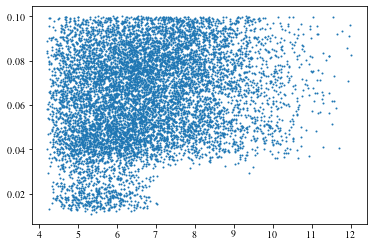

In [27]:
# good_idx = ((np.abs(astronn_VAC_f['dist_model_error']/astronn_VAC_f['dist'])<0.5) & (astronn_VAC_f['dist']<2e10) & (astronn_VAC_f['fakemag']<500) & (astronn_VAC_f['LOGG_ERR']<0.2))
# plt.hist(data['fakemag'])
plt.scatter(data['weighted_dist']/1000,data['weighted_dist_error']/data['weighted_dist'],s=1)


# Get the weighted Tinsley Diagram

In [28]:
fe_all = data['FE_H'][(data['LOGG']<1.5)]
mg_all = data['MG_FE'][(data['LOGG']<1.5)]
data_all = np.array([fe_all,mg_all])

fe_knot = data['FE_H'][mask_knot&(data['LOGG']<1.5)]
mg_knot = data['MG_FE'][mask_knot&(data['LOGG']<1.5)]
data_knot = np.array([fe_knot,mg_knot])

fe_bar = data['FE_H'][mask_bar&(data['LOGG']<1.5)]
mg_bar = data['MG_FE'][mask_bar&(data['LOGG']<1.5)]
data_bar = np.array([fe_bar,mg_bar])

fe_disc = data['FE_H'][mask_disc&(data['LOGG']<1.5)]
mg_disc = data['MG_FE'][mask_disc&(data['LOGG']<1.5)]
data_disc = np.array([fe_disc,mg_disc])


In [29]:
from scipy.stats import kde
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k_all = kde.gaussian_kde(data_all)
nbins=20
xi_all, yi_all = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_all = k_all(np.vstack([xi_all.flatten(), yi_all.flatten()]))

k_knot = kde.gaussian_kde(data_knot)
nbins=20
xi_knot, yi_knot = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_knot = k_knot(np.vstack([xi_knot.flatten(), yi_knot.flatten()]))

k_bar = kde.gaussian_kde(data_bar)
nbins=20
xi_bar, yi_bar = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_bar = k_bar(np.vstack([xi_bar.flatten(), yi_bar.flatten()]))

k_disc = kde.gaussian_kde(data_disc)
nbins=20
xi_disc, yi_disc = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_disc = k_disc(np.vstack([xi_disc.flatten(), yi_disc.flatten()]))


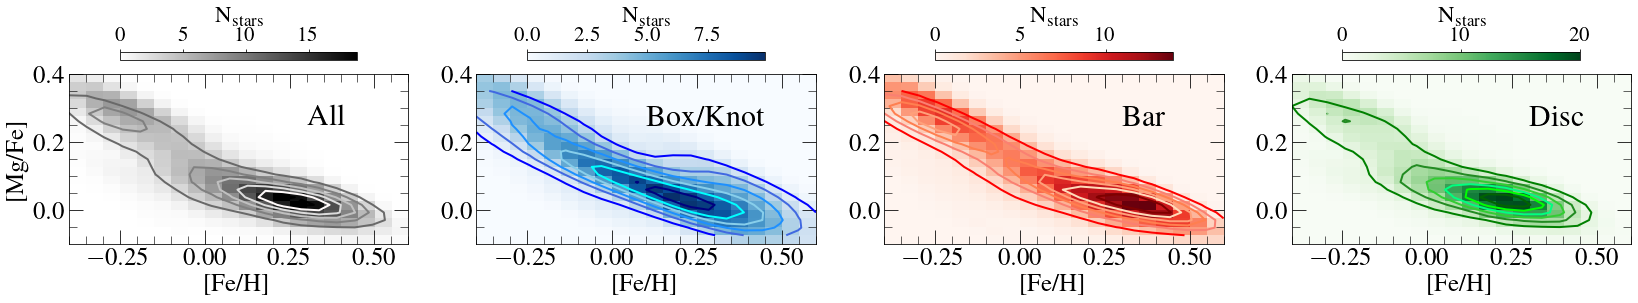

In [52]:
from matplotlib.colors import LogNorm
colores1 = ['k','dimgray','gray','silver','gainsboro','snow']
colores = ['navy','b','royalblue','dodgerblue','skyblue','cyan']
colores2 = ['maroon','r','salmon','coral','lightsalmon','peachpuff']
colores3 = ['darkgreen','g','forestgreen','limegreen','springgreen','lime']

fig, axes = plt.subplots(1, 4,figsize=(28,8),facecolor='white')


axes[0].text(0.3,0.25,'All',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[0].imshow(np.rot90(zi_all.reshape(xi_all.shape)),cmap='binary',extent=[-0.4, 0.6,-0.1, 0.4])
axes[0].contour(xi_all, yi_all, zi_all.reshape(xi_all.shape),levels=6,colors=colores1,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[0].set_xlabel('[Fe/H]',fontsize=25)
axes[0].set_ylabel('[Mg/Fe]',fontsize=25)
axes[0].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[0].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[0].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[0].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[0].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[0],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[0].subplot(1,3,1)
# axes[0].title('Knot',fontsize=20)
axes[1].text(0.1,0.25,'Box/Knot',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[1].imshow(np.rot90(zi_knot.reshape(xi_knot.shape)),cmap='Blues',extent=[-0.4, 0.6,-0.1, 0.4])
axes[1].contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[1].set_xlabel('[Fe/H]',fontsize=25)
# axes[1].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[1].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[1].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[1].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[1].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[1].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[1],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[1].subplot(1,3,2)
# axes[1].set_title('Bar',fontsize=20)
axes[2].text(0.3,0.25,'Bar',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
color2 = axes[2].imshow(np.rot90(zi_bar.reshape(xi_bar.shape)),cmap='Reds',extent=[-0.4, 0.6,-0.1, 0.4])
axes[2].contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[2].set_xlabel('[Fe/H]',fontsize=25)
# axes[2].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[2].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[2].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[2].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[2].minorticks_on()

# axes[1].colorbar(color2, aspect=40)
cax = axes[2].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color2,ax=axes[2],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[2].subplot(1,3,3)
# axes[2].set_title('Disc',fontsize=25)
axes[3].text(0.3,0.25,'Disc',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
color3 = axes[3].imshow(np.rot90(zi_disc.reshape(xi_disc.shape)),cmap='Greens',extent=[-0.4, 0.6,-0.1, 0.4])
axes[3].contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
# plt.xlim(-0.6,0.6)
# plt.ylim(-0.25,0.5)
axes[3].set_xlabel('[Fe/H]',fontsize=25)
# axes[3].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[3].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[3].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[3].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[3].minorticks_on()

cax = axes[3].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color3,ax=axes[3],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')


# Repeat the histograms now only picking low-alpha stars

In [31]:
mask_lowa = (data['MG_FE']<0.15)&(data['LOGG']<1.5)

(0.0, 6.0)

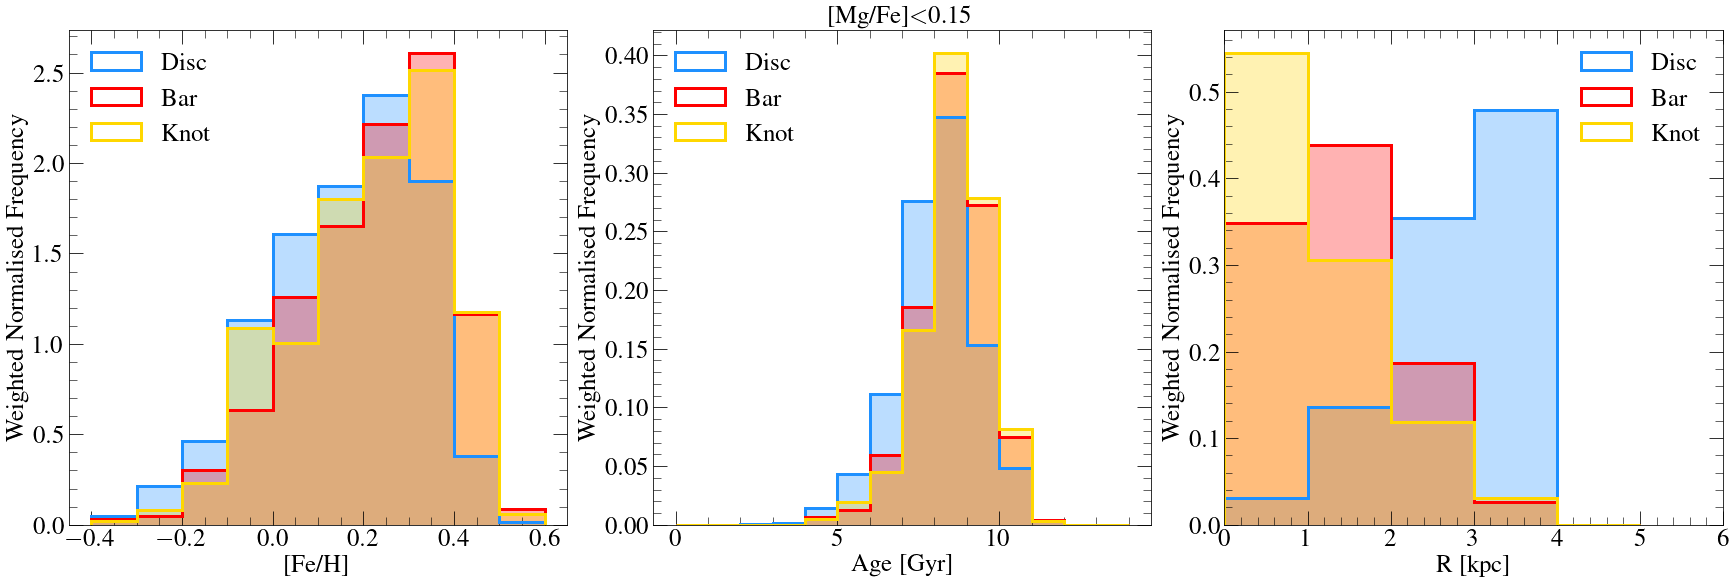

In [34]:
plt.figure(figsize=(24,8),constrained_layout=True,facecolor='white')


plt.subplot(1,3,1)
bins_feh = np.linspace(-0.4,0.6,11)

# plt.hist(data['FE_H'],bins_feh,color='k',alpha=0.3,density=True)
# plt.hist(data['FE_H'],bins_feh,color='k',histtype='step',lw=3,density=True,label='all')

plt.hist(data['FE_H'][mask_lowa],bins_feh,color='dodgerblue',alpha=0.3,density=True,weights=data['Disc_Probability'][mask_lowa])
plt.hist(data['FE_H'][mask_lowa],bins_feh,color='dodgerblue',histtype='step',lw=3,density=True,label='Disc',weights=data['Disc_Probability'][mask_lowa])

plt.hist(data['FE_H'][mask_lowa],bins_feh,color='r',alpha=0.3,density=True,weights=data['Bar_Probability'][mask_lowa])
plt.hist(data['FE_H'][mask_lowa],bins_feh,color='r',histtype='step',lw=3,density=True,label='Bar',weights=data['Bar_Probability'][mask_lowa])

plt.hist(data['FE_H'][mask_lowa],bins_feh,color='gold',alpha=0.3,density=True,weights=data['Knot_Probability'][mask_lowa])
plt.hist(data['FE_H'][mask_lowa],bins_feh,color='gold',histtype='step',lw=3,density=True,label='Knot',weights=data['Knot_Probability'][mask_lowa])

plt.xlabel('[Fe/H]',fontsize=25)
plt.ylabel('Weighted Normalised Frequency',fontsize=25)
plt.legend(loc='upper left',frameon=False,fontsize=25)

plt.tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
plt.tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()
# plt.ylim(0,2.5)

plt.subplot(1,3,2)
plt.title(r'[Mg/Fe]$<$0.15',fontsize=25)
bins_feh = np.linspace(0,14,15)

# plt.hist(data['FE_H'],bins_feh,color='k',alpha=0.3,density=True)
# plt.hist(data['FE_H'],bins_feh,color='k',histtype='step',lw=3,density=True,label='all')

plt.hist(data['age_lowess_correct'][mask_lowa],bins_feh,color='dodgerblue',alpha=0.3,density=True,weights=data['Disc_Probability'][mask_lowa])
plt.hist(data['age_lowess_correct'][mask_lowa],bins_feh,color='dodgerblue',histtype='step',lw=3,density=True,label='Disc',weights=data['Disc_Probability'][mask_lowa])

plt.hist(data['age_lowess_correct'][mask_lowa],bins_feh,color='r',alpha=0.3,density=True,weights=data['Bar_Probability'][mask_lowa])
plt.hist(data['age_lowess_correct'][mask_lowa],bins_feh,color='r',histtype='step',lw=3,density=True,label='Bar',weights=data['Bar_Probability'][mask_lowa])

plt.hist(data['age_lowess_correct'][mask_lowa],bins_feh,color='gold',alpha=0.3,density=True,weights=data['Knot_Probability'][mask_lowa])
plt.hist(data['age_lowess_correct'][mask_lowa],bins_feh,color='gold',histtype='step',lw=3,density=True,label='Knot',weights=data['Knot_Probability'][mask_lowa])

plt.xlabel('Age [Gyr]',fontsize=25)
plt.ylabel('Weighted Normalised Frequency',fontsize=25)
plt.legend(loc='upper left',frameon=False,fontsize=25)

plt.tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
plt.tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()
# plt.ylim(0,2.5)

plt.subplot(1,3,3)
bins_feh = np.linspace(0,5,6)
# plt.hist(data['FE_H'],bins_feh,color='k',alpha=0.3,density=True)
# plt.hist(data['FE_H'],bins_feh,color='k',histtype='step',lw=3,density=True,label='all')

plt.hist(Rgal[mask_lowa],bins_feh,color='dodgerblue',alpha=0.3,density=True,weights=data['Disc_Probability'][mask_lowa])
plt.hist(Rgal[mask_lowa],bins_feh,color='dodgerblue',histtype='step',lw=3,density=True,label='Disc',weights=data['Disc_Probability'][mask_lowa])

plt.hist(Rgal[mask_lowa],bins_feh,color='r',alpha=0.3,density=True,weights=data['Bar_Probability'][mask_lowa])
plt.hist(Rgal[mask_lowa],bins_feh,color='r',histtype='step',lw=3,density=True,label='Bar',weights=data['Bar_Probability'][mask_lowa])

plt.hist(Rgal[mask_lowa],bins_feh,color='gold',alpha=0.3,density=True,weights=data['Knot_Probability'][mask_lowa])
plt.hist(Rgal[mask_lowa],bins_feh,color='gold',histtype='step',lw=3,density=True,label='Knot',weights=data['Knot_Probability'][mask_lowa])

plt.xlabel('R [kpc]',fontsize=25)
plt.ylabel('Weighted Normalised Frequency',fontsize=25)
plt.legend(loc='upper right',frameon=False,fontsize=25)

plt.tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
plt.tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(0,6)


(0.0, 4.5)

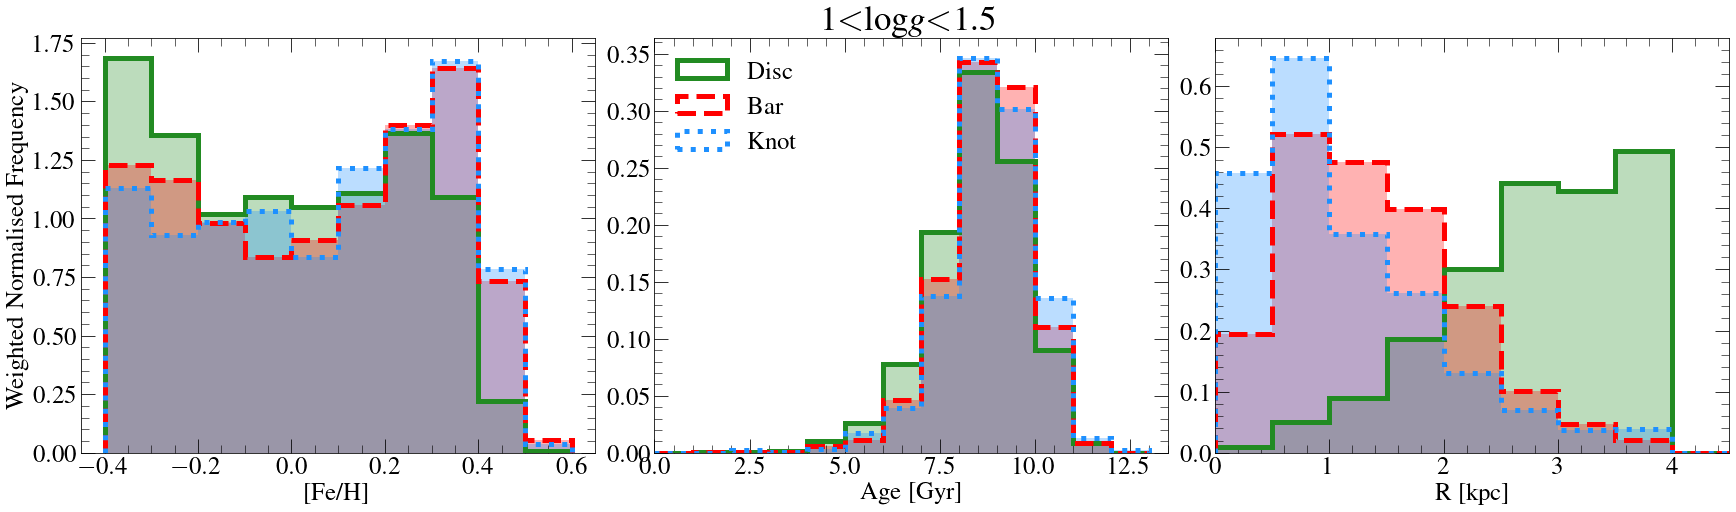

In [36]:
plt.figure(figsize=(24,7),constrained_layout=True,facecolor='white')


plt.subplot(1,3,1)
bins_feh = np.linspace(-0.4,0.6,11)

# plt.hist(data['FE_H'],bins_feh,color='k',alpha=0.3,density=True)
# plt.hist(data['FE_H'],bins_feh,color='k',histtype='step',lw=3,density=True,label='all')

plt.hist(data['FE_H'][(data['LOGG']<1.5)],bins_feh,color='forestgreen',alpha=0.3,density=True,weights=data['Disc_Probability'][(data['LOGG']<1.5)])
plt.hist(data['FE_H'][(data['LOGG']<1.5)],bins_feh,color='forestgreen',histtype='step',lw=5,density=True,label='Disc',weights=data['Disc_Probability'][(data['LOGG']<1.5)])

plt.hist(data['FE_H'][(data['LOGG']<1.5)],bins_feh,color='r',alpha=0.3,density=True,weights=data['Bar_Probability'][(data['LOGG']<1.5)])
plt.hist(data['FE_H'][(data['LOGG']<1.5)],bins_feh,color='r',histtype='step',lw=5,density=True,label='Bar',weights=data['Bar_Probability'][(data['LOGG']<1.5)],ls='dashed')

plt.hist(data['FE_H'][(data['LOGG']<1.5)],bins_feh,color='dodgerblue',alpha=0.3,density=True,weights=data['Knot_Probability'][(data['LOGG']<1.5)])
plt.hist(data['FE_H'][(data['LOGG']<1.5)],bins_feh,color='dodgerblue',histtype='step',lw=5,density=True,label='Knot',weights=data['Knot_Probability'][(data['LOGG']<1.5)],ls='dotted')

plt.xlabel('[Fe/H]',fontsize=25)
plt.ylabel('Weighted Normalised Frequency',fontsize=25)
# plt.legend(loc='upper left',frameon=False,fontsize=25)

plt.tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
plt.tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()
# plt.ylim(0,2.5)

plt.subplot(1,3,2)
plt.title(r'1$<$log$g$$<$1.5',fontsize=35)
bins_feh = np.linspace(0,13,14)

# plt.hist(data['FE_H'],bins_feh,color='k',alpha=0.3,density=True)
# plt.hist(data['FE_H'],bins_feh,color='k',histtype='step',lw=3,density=True,label='all')

plt.hist(data['age_lowess_correct'][(data['LOGG']<1.5)],bins_feh,color='forestgreen',alpha=0.3,density=True,weights=data['Disc_Probability'][(data['LOGG']<1.5)])
plt.hist(data['age_lowess_correct'][(data['LOGG']<1.5)],bins_feh,color='forestgreen',histtype='step',lw=5,density=True,label='Disc',weights=data['Disc_Probability'][(data['LOGG']<1.5)])

plt.hist(data['age_lowess_correct'][(data['LOGG']<1.5)],bins_feh,color='r',alpha=0.3,density=True,weights=data['Bar_Probability'][(data['LOGG']<1.5)])
plt.hist(data['age_lowess_correct'][(data['LOGG']<1.5)],bins_feh,color='r',histtype='step',lw=5,density=True,label='Bar',weights=data['Bar_Probability'][(data['LOGG']<1.5)],ls='dashed')

plt.hist(data['age_lowess_correct'][(data['LOGG']<1.5)],bins_feh,color='dodgerblue',alpha=0.3,density=True,weights=data['Knot_Probability'][(data['LOGG']<1.5)])
plt.hist(data['age_lowess_correct'][(data['LOGG']<1.5)],bins_feh,color='dodgerblue',histtype='step',lw=5,density=True,label='Knot',weights=data['Knot_Probability'][(data['LOGG']<1.5)],ls='dotted')

plt.xlabel('Age [Gyr]',fontsize=25)
# plt.ylabel('Weighted Normalised Frequency',fontsize=25)
plt.legend(loc='upper left',frameon=False,fontsize=25)

plt.tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
plt.tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(0,13.5)

plt.subplot(1,3,3)
bins_feh = np.linspace(0,5,11)
# plt.hist(data['FE_H'],bins_feh,color='k',alpha=0.3,density=True)
# plt.hist(data['FE_H'],bins_feh,color='k',histtype='step',lw=3,density=True,label='all')

plt.hist(Rgal[(data['LOGG']<1.5)],bins_feh,color='forestgreen',alpha=0.3,density=True,weights=data['Disc_Probability'][(data['LOGG']<1.5)])
plt.hist(Rgal[(data['LOGG']<1.5)],bins_feh,color='forestgreen',histtype='step',lw=5,density=True,label='Disc',weights=data['Disc_Probability'][(data['LOGG']<1.5)])

plt.hist(Rgal[(data['LOGG']<1.5)],bins_feh,color='r',alpha=0.3,density=True,weights=data['Bar_Probability'][(data['LOGG']<1.5)])
plt.hist(Rgal[(data['LOGG']<1.5)],bins_feh,color='r',histtype='step',lw=5,density=True,label='Bar',weights=data['Bar_Probability'][(data['LOGG']<1.5)],ls='dashed')

plt.hist(Rgal[(data['LOGG']<1.5)],bins_feh,color='dodgerblue',alpha=0.3,density=True,weights=data['Knot_Probability'][(data['LOGG']<1.5)])
plt.hist(Rgal[(data['LOGG']<1.5)],bins_feh,color='dodgerblue',histtype='step',lw=5,density=True,label='Knot',weights=data['Knot_Probability'][(data['LOGG']<1.5)],ls='dotted')

plt.xlabel('R [kpc]',fontsize=25)
# plt.ylabel('Weighted Normalised Frequency',fontsize=25)
# plt.legend(loc='upper right',frameon=False,fontsize=25)

plt.tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
plt.tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(0,4.5)


In [38]:
# run a ks test on the MDFs of the three samples

from scipy import stats

age_knot, bin_edges_knot = np.histogram(data['age_lowess_correct'][(data['LOGG']<1.5)],bins= bins_feh,weights=data['Knot_Probability'][(data['LOGG']<1.5)])
age_bar, bin_edges_bar = np.histogram(data['age_lowess_correct'][(data['LOGG']<1.5)],bins= bins_feh,weights=data['Bar_Probability'][(data['LOGG']<1.5)])
age_disc, bin_edges_disc = np.histogram(data['age_lowess_correct'][(data['LOGG']<1.5)],bins= bins_feh,weights=data['Disc_Probability'][(data['LOGG']<1.5)])

knot_bar_ks = stats.ks_2samp(age_knot,age_bar)
knot_disc_ks = stats.ks_2samp(age_knot,age_disc)
disc_bar_ks = stats.ks_2samp(age_disc,age_bar)

In [39]:
print(knot_bar_ks)
print(knot_disc_ks)
print(disc_bar_ks)
# KS results and p-value suggest they are all the same!

KstestResult(statistic=0.3, pvalue=0.7869297884777761)
KstestResult(statistic=0.6, pvalue=0.05244755244755244)
KstestResult(statistic=0.3, pvalue=0.7869297884777761)


# Do it also for all stars with $|$Z$|$$<$0.3 kpc

In [40]:
zgal = (data['Zgal']*8.178)

In [41]:
mask_z = (np.abs(zgal)<0.3)&(data['LOGG']<1.5)

(0.0, 4.5)

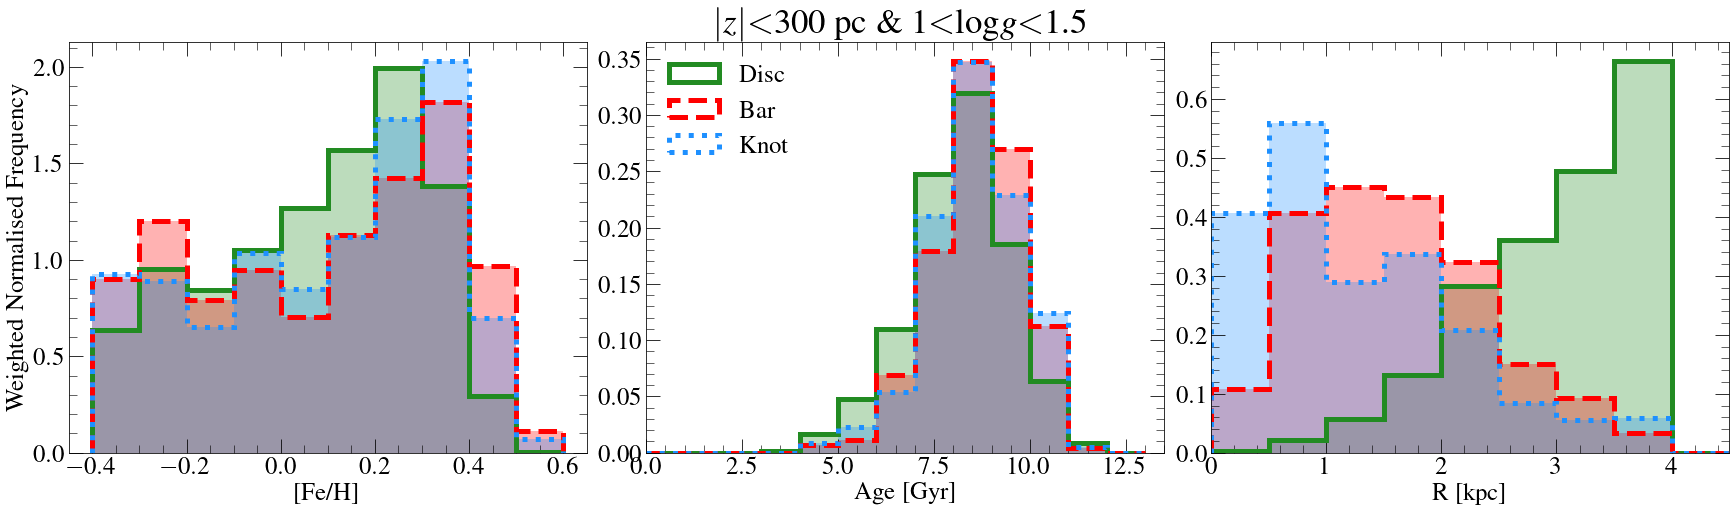

In [43]:
plt.figure(figsize=(24,7),constrained_layout=True,facecolor='white')


plt.subplot(1,3,1)
bins_feh = np.linspace(-0.4,0.6,11)

# plt.hist(data['FE_H'],bins_feh,color='k',alpha=0.3,density=True)
# plt.hist(data['FE_H'],bins_feh,color='k',histtype='step',lw=3,density=True,label='all')

plt.hist(data['FE_H'][mask_z],bins_feh,color='forestgreen',alpha=0.3,density=True,weights=data['Disc_Probability'][mask_z])
plt.hist(data['FE_H'][mask_z],bins_feh,color='forestgreen',histtype='step',lw=5,density=True,label='Disc',weights=data['Disc_Probability'][mask_z])

plt.hist(data['FE_H'][mask_z],bins_feh,color='r',alpha=0.3,density=True,weights=data['Bar_Probability'][mask_z])
plt.hist(data['FE_H'][mask_z],bins_feh,color='r',histtype='step',lw=5,density=True,label='Bar',weights=data['Bar_Probability'][mask_z],ls='dashed')

plt.hist(data['FE_H'][mask_z],bins_feh,color='dodgerblue',alpha=0.3,density=True,weights=data['Knot_Probability'][mask_z])
plt.hist(data['FE_H'][mask_z],bins_feh,color='dodgerblue',histtype='step',lw=5,density=True,label='Knot',weights=data['Knot_Probability'][mask_z],ls='dotted')

plt.xlabel('[Fe/H]',fontsize=25)
plt.ylabel('Weighted Normalised Frequency',fontsize=25)
# plt.legend(loc='upper left',frameon=False,fontsize=25)

plt.tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
plt.tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()
# plt.ylim(0,2.5)

plt.subplot(1,3,2)
plt.title(r'$|z|$$<$300 pc $\&$ 1$<$log$g$$<$1.5',fontsize=35)
bins_feh = np.linspace(0,13,14)

# plt.hist(data['FE_H'],bins_feh,color='k',alpha=0.3,density=True)
# plt.hist(data['FE_H'],bins_feh,color='k',histtype='step',lw=3,density=True,label='all')

plt.hist(data['age_lowess_correct'][mask_z],bins_feh,color='forestgreen',alpha=0.3,density=True,weights=data['Disc_Probability'][mask_z])
plt.hist(data['age_lowess_correct'][mask_z],bins_feh,color='forestgreen',histtype='step',lw=5,density=True,label='Disc',weights=data['Disc_Probability'][mask_z])

plt.hist(data['age_lowess_correct'][mask_z],bins_feh,color='r',alpha=0.3,density=True,weights=data['Bar_Probability'][mask_z])
plt.hist(data['age_lowess_correct'][mask_z],bins_feh,color='r',histtype='step',lw=5,density=True,label='Bar',weights=data['Bar_Probability'][mask_z],ls='dashed')

plt.hist(data['age_lowess_correct'][mask_z],bins_feh,color='dodgerblue',alpha=0.3,density=True,weights=data['Knot_Probability'][mask_z])
plt.hist(data['age_lowess_correct'][mask_z],bins_feh,color='dodgerblue',histtype='step',lw=5,density=True,label='Knot',weights=data['Knot_Probability'][mask_z],ls='dotted')

plt.xlabel('Age [Gyr]',fontsize=25)
# plt.ylabel('Weighted Normalised Frequency',fontsize=25)
plt.legend(loc='upper left',frameon=False,fontsize=25)

plt.tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
plt.tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(0,13.5)

plt.subplot(1,3,3)
bins_feh = np.linspace(0,5,11)
# plt.hist(data['FE_H'],bins_feh,color='k',alpha=0.3,density=True)
# plt.hist(data['FE_H'],bins_feh,color='k',histtype='step',lw=3,density=True,label='all')

plt.hist(Rgal[mask_z],bins_feh,color='forestgreen',alpha=0.3,density=True,weights=data['Disc_Probability'][mask_z])
plt.hist(Rgal[mask_z],bins_feh,color='forestgreen',histtype='step',lw=5,density=True,label='Disc',weights=data['Disc_Probability'][mask_z])

plt.hist(Rgal[mask_z],bins_feh,color='r',alpha=0.3,density=True,weights=data['Bar_Probability'][mask_z])
plt.hist(Rgal[mask_z],bins_feh,color='r',histtype='step',lw=5,density=True,label='Bar',weights=data['Bar_Probability'][mask_z],ls='dashed')

plt.hist(Rgal[mask_z],bins_feh,color='dodgerblue',alpha=0.3,density=True,weights=data['Knot_Probability'][mask_z])
plt.hist(Rgal[mask_z],bins_feh,color='dodgerblue',histtype='step',lw=5,density=True,label='Knot',weights=data['Knot_Probability'][mask_z],ls='dotted')

plt.xlabel('R [kpc]',fontsize=25)
# plt.ylabel('Weighted Normalised Frequency',fontsize=25)
# plt.legend(loc='upper right',frameon=False,fontsize=25)

plt.tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
plt.tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(0,4.5)


In [44]:
# run a ks test on the MDFs of the three samples

from scipy import stats

age_knot, bin_edges_knot = np.histogram(data['age_lowess_correct'][mask_z],bins= bins_feh,weights=data['Knot_Probability'][mask_z])
age_bar, bin_edges_bar = np.histogram(data['age_lowess_correct'][mask_z],bins= bins_feh,weights=data['Bar_Probability'][mask_z])
age_disc, bin_edges_disc = np.histogram(data['age_lowess_correct'][mask_z],bins= bins_feh,weights=data['Disc_Probability'][mask_z])

knot_bar_ks = stats.ks_2samp(age_knot,age_bar)
knot_disc_ks = stats.ks_2samp(age_knot,age_disc)
disc_bar_ks = stats.ks_2samp(age_disc,age_bar)


In [45]:
print(knot_bar_ks)
print(knot_disc_ks)
print(disc_bar_ks)
# KS results and p-value suggest they are all the same!

KstestResult(statistic=0.2, pvalue=0.9944575548290717)
KstestResult(statistic=0.3, pvalue=0.7869297884777761)
KstestResult(statistic=0.2, pvalue=0.9944575548290717)


# Get the weighted Tinsley diagram for stars within 0.3 kpc of the midplane

In [54]:
fe_all = data['FE_H'][mask_z]
mg_all = data['MG_FE'][mask_z]
data_all = np.array([fe_all,mg_all])

fe_knot = data['FE_H'][mask_knot&mask_z]
mg_knot = data['MG_FE'][mask_knot&mask_z]
data_knot = np.array([fe_knot,mg_knot])

fe_bar = data['FE_H'][mask_bar&mask_z]
mg_bar = data['MG_FE'][mask_bar&mask_z]
data_bar = np.array([fe_bar,mg_bar])

fe_disc = data['FE_H'][mask_disc&mask_z]
mg_disc = data['MG_FE'][mask_disc&mask_z]
data_disc = np.array([fe_disc,mg_disc])

In [55]:
from scipy.stats import kde
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k_knot = kde.gaussian_kde(data_knot)
nbins=20
xi_knot, yi_knot = np.mgrid[-0.4:0.6:nbins*1j, -0.075:0.35:nbins*1j]
zi_knot = k_knot(np.vstack([xi_knot.flatten(), yi_knot.flatten()]))

k_bar = kde.gaussian_kde(data_bar)
nbins=20
xi_bar, yi_bar = np.mgrid[-0.4:0.6:nbins*1j, -0.075:0.35:nbins*1j]
zi_bar = k_bar(np.vstack([xi_bar.flatten(), yi_bar.flatten()]))

k_disc = kde.gaussian_kde(data_disc)
nbins=20
xi_disc, yi_disc = np.mgrid[-0.4:0.6:nbins*1j, -0.075:0.35:nbins*1j]
zi_disc = k_disc(np.vstack([xi_disc.flatten(), yi_disc.flatten()]))


Text(0.5, 0, '[Fe/H]')

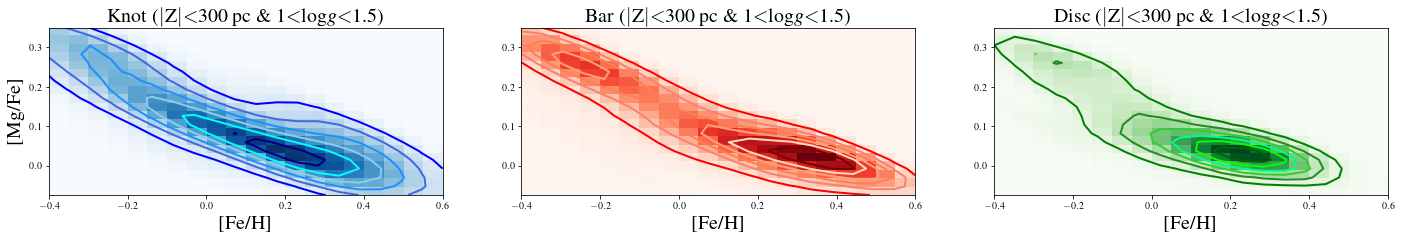

In [48]:
from matplotlib.colors import LogNorm
colores = ['navy','b','royalblue','dodgerblue','skyblue','cyan']
colores2 = ['maroon','r','salmon','coral','lightsalmon','peachpuff']
colores3 = ['darkgreen','g','forestgreen','limegreen','springgreen','lime']

plt.figure(figsize=(24,7),facecolor='white')
plt.subplot(1,3,1)
plt.title('Knot ($|$Z$|$$<$300 pc $\&$ 1$<$log$g$$<$1.5)',fontsize=20)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
plt.imshow(np.rot90(zi_knot.reshape(xi_knot.shape)),cmap='Blues',extent=[-0.4, 0.6,-0.075, 0.35])
plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
plt.xlabel('[Fe/H]',fontsize=20)
plt.ylabel('[Mg/Fe]',fontsize=20)

plt.subplot(1,3,2)
plt.title('Bar ($|$Z$|$$<$300 pc $\&$ 1$<$log$g$$<$1.5)',fontsize=20)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
plt.imshow(np.rot90(zi_bar.reshape(xi_bar.shape)),cmap='Reds',extent=[-0.4,0.6,-0.075,0.35])
plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
plt.xlabel('[Fe/H]',fontsize=20)

plt.subplot(1,3,3)
plt.title('Disc ($|$Z$|$$<$300 pc $\&$ 1$<$log$g$$<$1.5)',fontsize=20)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
plt.imshow(np.rot90(zi_disc.reshape(xi_disc.shape)),cmap='Greens',extent=[-0.4, 0.6,-0.075, 0.35])
plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
# plt.xlim(-0.6,0.6)
# plt.ylim(-0.25,0.5)
plt.xlabel('[Fe/H]',fontsize=20)

# why do they have different slopes???

In [56]:
from scipy.stats import kde
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k_all = kde.gaussian_kde(data_all)
nbins=20
xi_all, yi_all = np.mgrid[-0.4:0.6:nbins*1j, -0.075:0.35:nbins*1j]
zi_all = k_all(np.vstack([xi_all.flatten(), yi_all.flatten()]))

k_knot = kde.gaussian_kde(data_knot)
nbins=20
xi_knot, yi_knot = np.mgrid[-0.4:0.6:nbins*1j, -0.075:0.35:nbins*1j]
zi_knot = k_knot(np.vstack([xi_knot.flatten(), yi_knot.flatten()]))

k_bar = kde.gaussian_kde(data_bar)
nbins=20
xi_bar, yi_bar = np.mgrid[-0.4:0.6:nbins*1j, -0.075:0.35:nbins*1j]
zi_bar = k_bar(np.vstack([xi_bar.flatten(), yi_bar.flatten()]))

k_disc = kde.gaussian_kde(data_disc)
nbins=20
xi_disc, yi_disc = np.mgrid[-0.4:0.6:nbins*1j, -0.075:0.35:nbins*1j]
zi_disc = k_disc(np.vstack([xi_disc.flatten(), yi_disc.flatten()]))


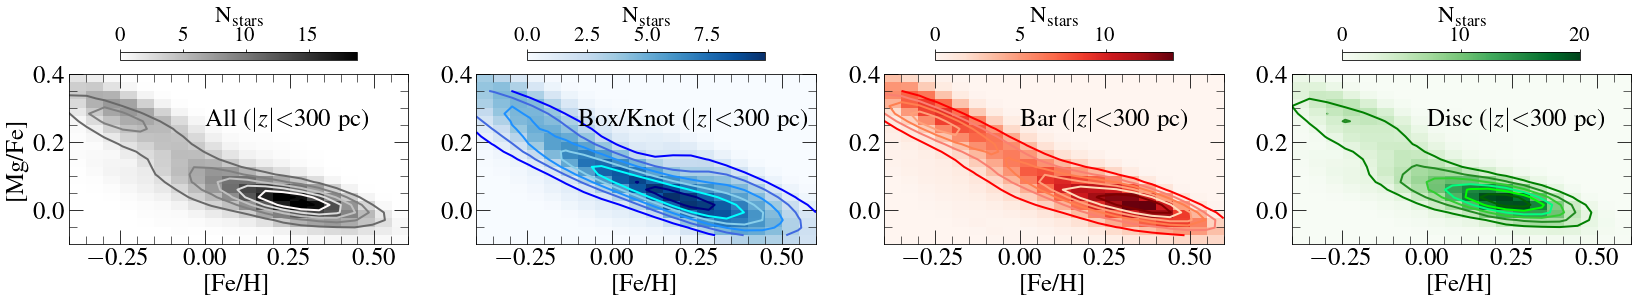

In [57]:
from matplotlib.colors import LogNorm
colores1 = ['k','dimgray','gray','silver','gainsboro','snow']
colores = ['navy','b','royalblue','dodgerblue','skyblue','cyan']
colores2 = ['maroon','r','salmon','coral','lightsalmon','peachpuff']
colores3 = ['darkgreen','g','forestgreen','limegreen','springgreen','lime']

fig, axes = plt.subplots(1, 4,figsize=(28,8),facecolor='white')


axes[0].text(0.,0.25,'All ($|z|$$<$300 pc)',fontsize=25)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[0].imshow(np.rot90(zi_all.reshape(xi_all.shape)),cmap='binary',extent=[-0.4, 0.6,-0.1, 0.4])
axes[0].contour(xi_all, yi_all, zi_all.reshape(xi_all.shape),levels=6,colors=colores1,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[0].set_xlabel('[Fe/H]',fontsize=25)
axes[0].set_ylabel('[Mg/Fe]',fontsize=25)
axes[0].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[0].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[0].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[0].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[0].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[0],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[0].subplot(1,3,1)
# axes[0].title('Knot',fontsize=20)
axes[1].text(-0.1,0.25,'Box/Knot ($|z|$$<$300 pc)',fontsize=25)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[1].imshow(np.rot90(zi_knot.reshape(xi_knot.shape)),cmap='Blues',extent=[-0.4, 0.6,-0.1, 0.4])
axes[1].contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[1].set_xlabel('[Fe/H]',fontsize=25)
# axes[1].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[1].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[1].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[1].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[1].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[1].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[1],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[1].subplot(1,3,2)
# axes[1].set_title('Bar',fontsize=20)
axes[2].text(0.,0.25,'Bar ($|z|$$<$300 pc)',fontsize=25)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
color2 = axes[2].imshow(np.rot90(zi_bar.reshape(xi_bar.shape)),cmap='Reds',extent=[-0.4, 0.6,-0.1, 0.4])
axes[2].contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[2].set_xlabel('[Fe/H]',fontsize=25)
# axes[2].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[2].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[2].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[2].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[2].minorticks_on()

# axes[1].colorbar(color2, aspect=40)
cax = axes[2].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color2,ax=axes[2],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[2].subplot(1,3,3)
# axes[2].set_title('Disc',fontsize=25)
axes[3].text(0.,0.25,'Disc ($|z|$$<$300 pc)',fontsize=25)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
color3 = axes[3].imshow(np.rot90(zi_disc.reshape(xi_disc.shape)),cmap='Greens',extent=[-0.4, 0.6,-0.1, 0.4])
axes[3].contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
# plt.xlim(-0.6,0.6)
# plt.ylim(-0.25,0.5)
axes[3].set_xlabel('[Fe/H]',fontsize=25)
# axes[3].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[3].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[3].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[3].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[3].minorticks_on()

cax = axes[3].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color3,ax=axes[3],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')



### This plot just above is for 1$<$log$g$$<$1.5

In [129]:
print(len(data[mask_knot&mask_z&(data['MG_FE']>0.15)]))
print(len(data[mask_knot&mask_z]))
print(len(data[mask_knot&mask_z&(data['MG_FE']>0.15)])/len(data[mask_knot&mask_z]))

print(len(data[mask_bar&mask_z&(data['MG_FE']>0.15)]))
print(len(data[mask_bar&mask_z]))
print(len(data[mask_bar&mask_z&(data['MG_FE']>0.15)])/len(data[mask_bar&mask_z]))

print(len(data[mask_disc&mask_z&(data['MG_FE']>0.15)]))
print(len(data[mask_disc&mask_z]))
print(len(data[mask_disc&mask_z&(data['MG_FE']>0.15)])/len(data[mask_disc&mask_z]))

6
20
0.3
47
200
0.235
93
632
0.14715189873417722


In [14]:
def plot_abun(abun, fehs, mask, mask2,  mask3):
    """
    Function to plot all the abundances in APOGEE
    """
    import matplotlib.gridspec as grid

#     fig, all_axes = plt.subplots(4, 5, constrained_layout=True, figsize=(20, 20))
    fig = plt.figure(constrained_layout=True,figsize=(26,20))
    gs = grid.GridSpec(5,4)
    p = 0
    # loop over the abundances
    for indx, i in enumerate(abun):
        
        xfe_labels = ['[C/Fe]','[N/Fe]','[O/Fe]','[Na/Fe]','[Mg/Fe]','[Al/Fe]',\
                      '[Si/Fe]','[P/Fe]','[S/Fe]','[K/Fe]','[Ca/Fe]','[Ti/Fe]',\
                     '[V/Fe]','[Cr/Fe]','[Mn/Fe]','[Co/Fe]','[Ni/Fe]','[Ce/Fe]']
        vmins = [-0.5]
        vmaxs = [0.5]
        
        ax = fig.add_subplot(gs[p])
        mask_ = (fehs>-10)&(abun[indx]>-10)
        ax.scatter(fehs[mask&mask_],abun[indx][mask&mask_],c='dodgerblue',s=15,label='Disc')
        ax.scatter(fehs[mask2&mask_],abun[indx][mask2&mask_],c='r',s=15,label='Bar')
        ax.scatter(fehs[mask3&mask_],abun[indx][mask3&mask_],c='gold',s=15,label='Knot')
        plt.legend(loc='best')
        ax.set_xlabel('[Fe/H]',fontsize=20)
        ax.set_ylabel(xfe_labels[indx],fontsize=20)
        ax.set_xlim(-0.5,0.7)
        ax.set_ylim(-0.5,0.5)
        p+=1
        

In [15]:
abun = np.array([data['C_FE'],data['N_FE'],data['O_FE'],data['NA_FE'],data['MG_FE'],data['AL_FE'],data['SI_FE'],\
                data['P_FE'],data['S_FE'],data['K_FE'],data['CA_FE'],data['TI_FE'],data['V_FE'],data['CR_FE'],\
                data['MN_FE'],data['CO_FE'],data['NI_FE'],data['CE_FE']])
print(len(abun))

18


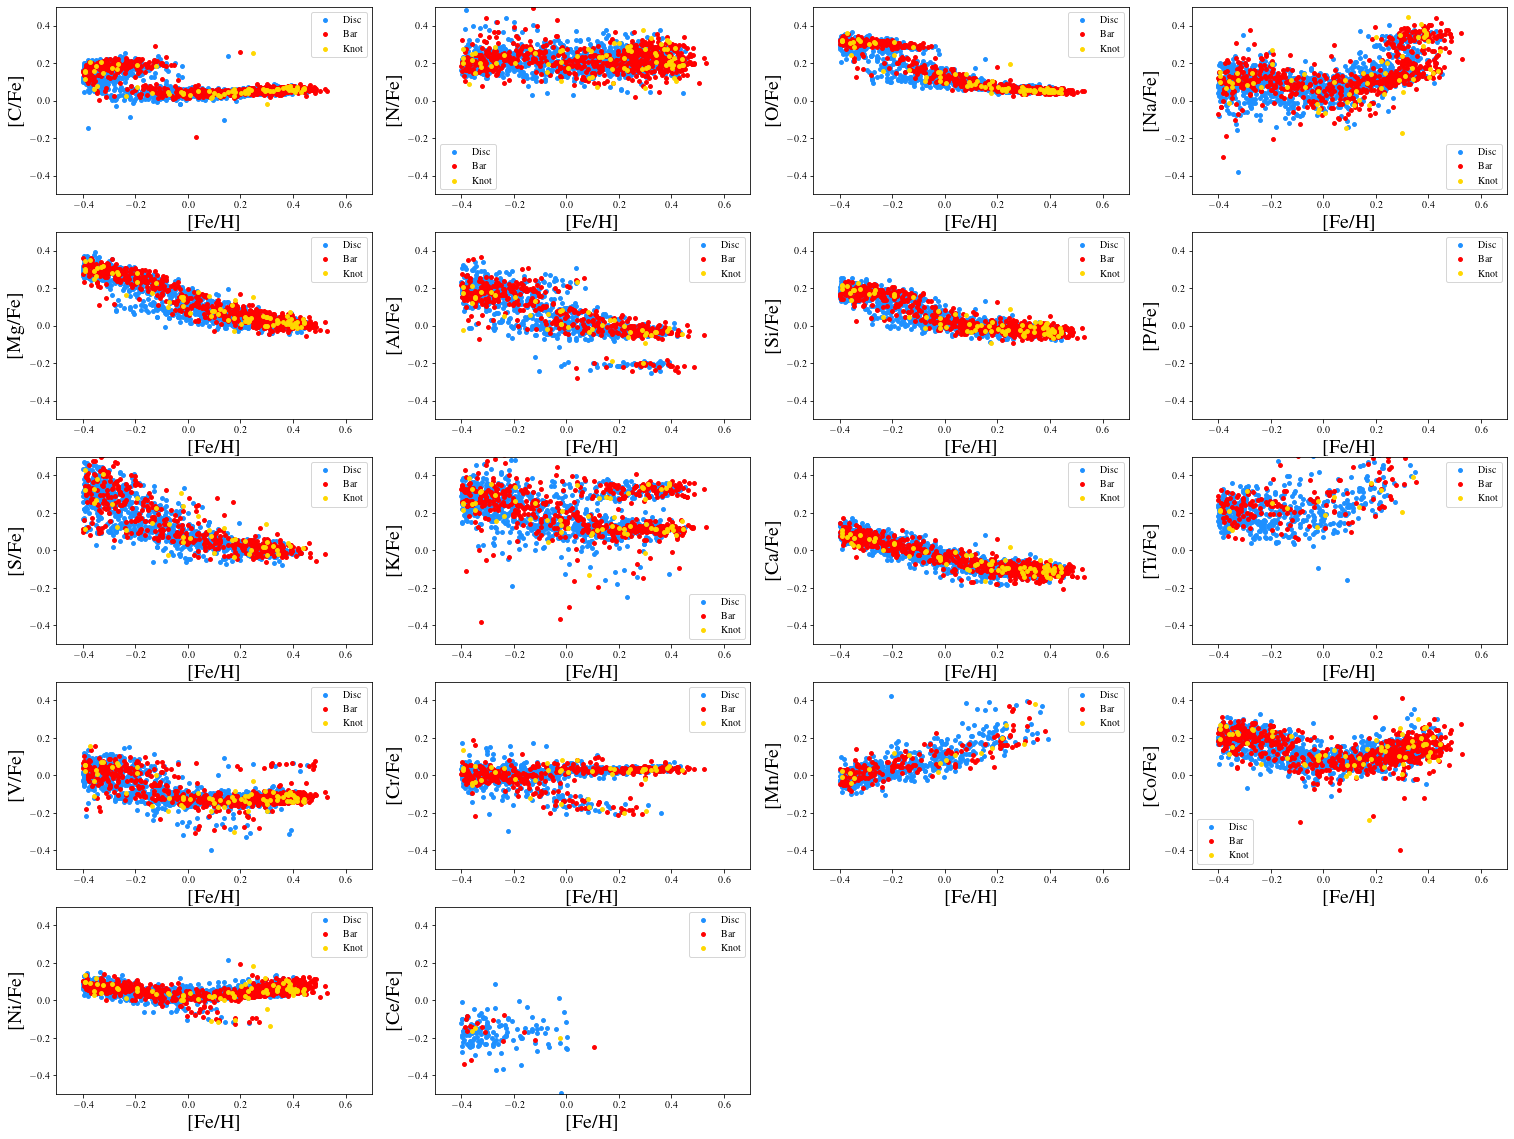

In [16]:
mask_plot = (data['LOGG']<1.5)&(data['LOGG']>1)

plot_abun(abun,data['FE_H'],mask_disc&mask_plot,mask_bar&mask_plot,mask_knot&mask_plot)

In [17]:
mask_knot2 = data['Knot Probability']>0.9
mask_bar2 = data['Bar Probability']>0.9
mask_disc2 = data['Disc Probability']>0.9

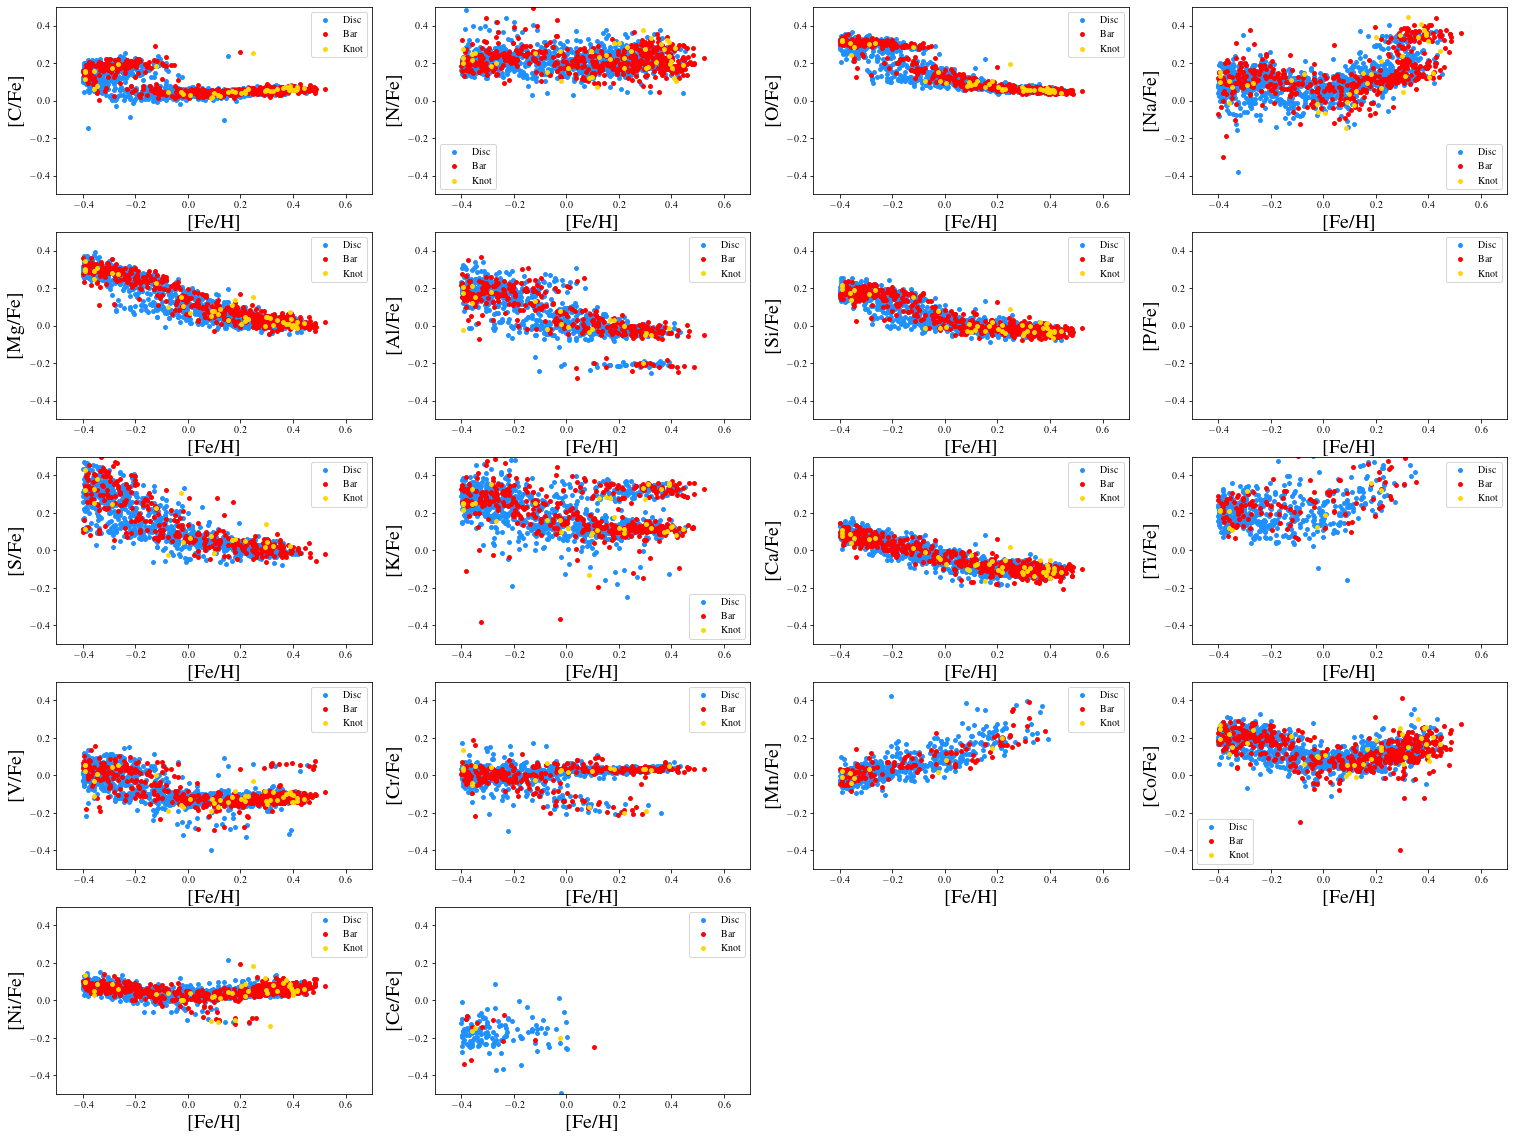

In [18]:
mask_plot = (data['LOGG']<1.5)&(data['LOGG']>1)

plot_abun(abun,data['FE_H'],mask_disc2&mask_plot,mask_bar2&mask_plot,mask_knot2&mask_plot)

In [19]:
mask_knot2 = data['Knot Probability']>0.7
mask_bar2 = data['Bar Probability']>0.7
mask_disc2 = data['Disc Probability']>0.7

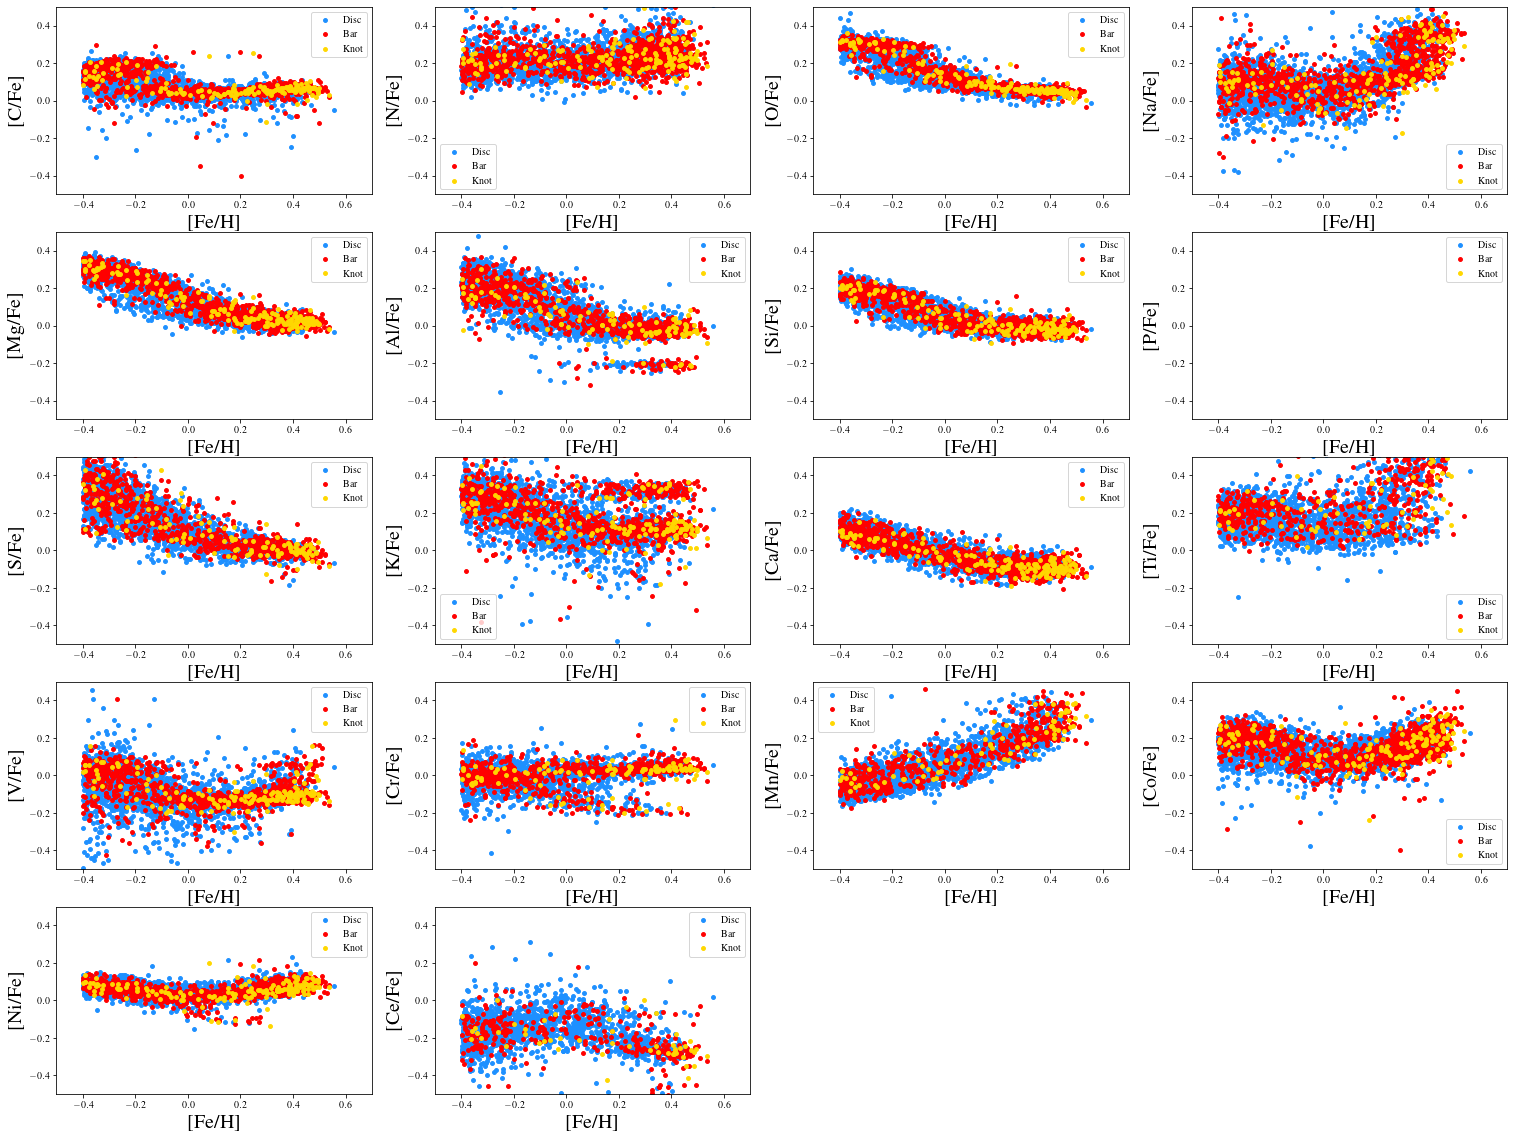

In [20]:
plot_abun(abun,data['FE_H'],mask_disc2,mask_bar2,mask_knot2)

# Plot anti-correlations for the knot

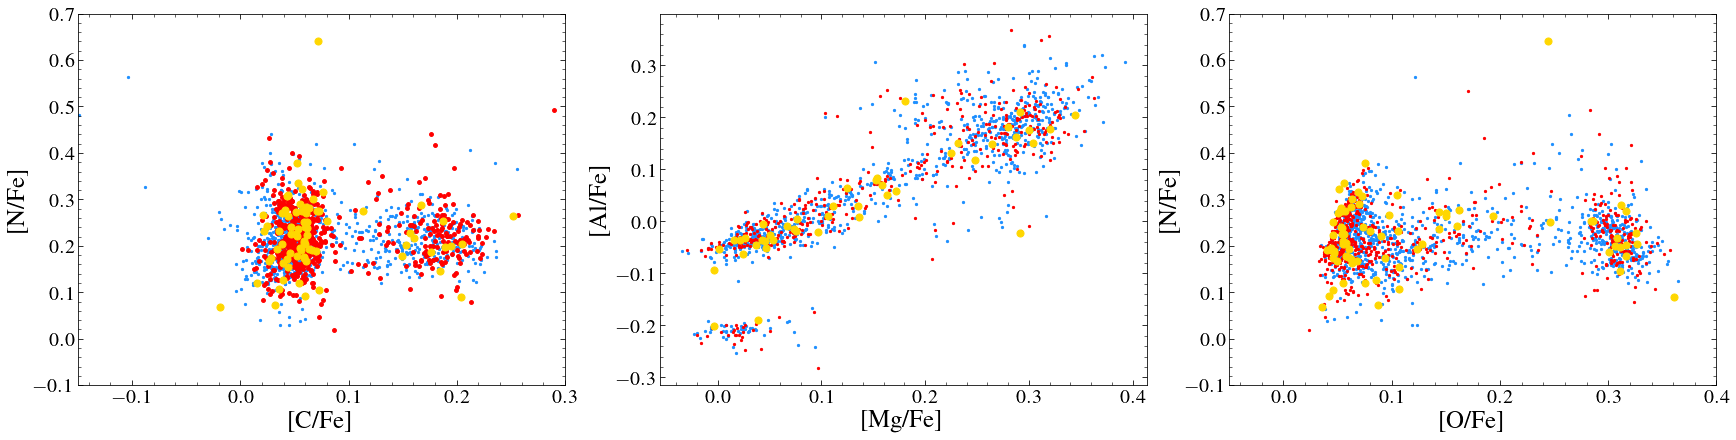

In [33]:
mask_plot = (data['LOGG']<1.5)&(data['LOGG']>1)
fig = plt.figure(constrained_layout=True,figsize=(24,6))

plt.subplot(1,3,1)
plt.scatter(data['C_FE'][mask_disc&mask_plot],data['N_FE'][mask_disc&mask_plot],s=5,c='dodgerblue')
plt.scatter(data['C_FE'][mask_bar&mask_plot],data['N_FE'][mask_bar&mask_plot],s=15,c='r')
plt.scatter(data['C_FE'][mask_knot&mask_plot],data['N_FE'][mask_knot&mask_plot],s=50,color='gold')
plt.xlim(-0.15,0.3)
plt.ylim(-0.1,0.7)
plt.xlabel('[C/Fe]',fontsize=25)
plt.ylabel('[N/Fe]',fontsize=25)
plt.tick_params(labelsize=16,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=5)
plt.tick_params(which='minor', length=3, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,3,2)
plt.scatter(data['MG_FE'][mask_disc&mask_plot],data['AL_FE'][mask_disc&mask_plot],s=5,c='dodgerblue')# plt.xlim(-0.15,0.3)
plt.scatter(data['MG_FE'][mask_bar&mask_plot],data['AL_FE'][mask_bar&mask_plot],s=5,c='r')# plt.xlim(-0.15,0.3)
plt.scatter(data['MG_FE'][mask_knot&mask_plot],data['AL_FE'][mask_knot&mask_plot],s=50,color='gold')
# plt.ylim(-0.1,0.7)
plt.xlabel('[Mg/Fe]',fontsize=25)
plt.ylabel('[Al/Fe]',fontsize=25)
plt.tick_params(labelsize=16,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=5)
plt.tick_params(which='minor', length=3, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,3,3)
plt.scatter(data['O_FE'][mask_disc&mask_plot],data['N_FE'][mask_disc&mask_plot],s=5,c='dodgerblue')# plt.xlim(-0.15,0.3)
plt.scatter(data['O_FE'][mask_bar&mask_plot],data['N_FE'][mask_bar&mask_plot],s=5,c='r')# plt.xlim(-0.15,0.3)
plt.scatter(data['O_FE'][mask_knot&mask_plot],data['N_FE'][mask_knot&mask_plot],s=50,color='gold')
plt.xlim(-0.05,0.4)
plt.ylim(-0.1,0.7)
plt.xlabel('[O/Fe]',fontsize=25)
plt.ylabel('[N/Fe]',fontsize=25)
plt.tick_params(labelsize=16,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=5)
plt.tick_params(which='minor', length=3, direction='in',top=True,right=True)
plt.minorticks_on()

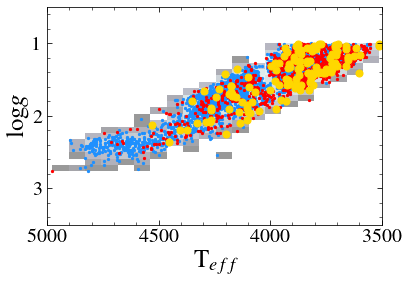

In [34]:
plt.hist2d(data['TEFF'][(data['LOGG']>-10)&(data['TEFF']>-10)],data['LOGG'][(data['LOGG']>-10)&(data['TEFF']>-10)],cmap='bone',bins=20,norm=LogNorm(),alpha=0.4)# plt.xlim(-0.15,0.3)
plt.scatter(data['TEFF'][mask_disc],data['LOGG'][mask_disc],s=5,c='dodgerblue')# plt.xlim(-0.15,0.3)
plt.scatter(data['TEFF'][mask_bar],data['LOGG'][mask_bar],s=5,c='r')# plt.xlim(-0.15,0.3)
plt.scatter(data['TEFF'][mask_knot],data['LOGG'][mask_knot],s=50,color='gold')
plt.xlim(5000,3500)
plt.ylim(3.5,0.5)
plt.xlabel('T$_{eff}$',fontsize=25)
plt.ylabel('log$g$',fontsize=25)
plt.tick_params(labelsize=16,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=5)
plt.tick_params(which='minor', length=3, direction='in',top=True,right=True)
plt.minorticks_on()

Text(0, 0.5, '[Na/Fe]')

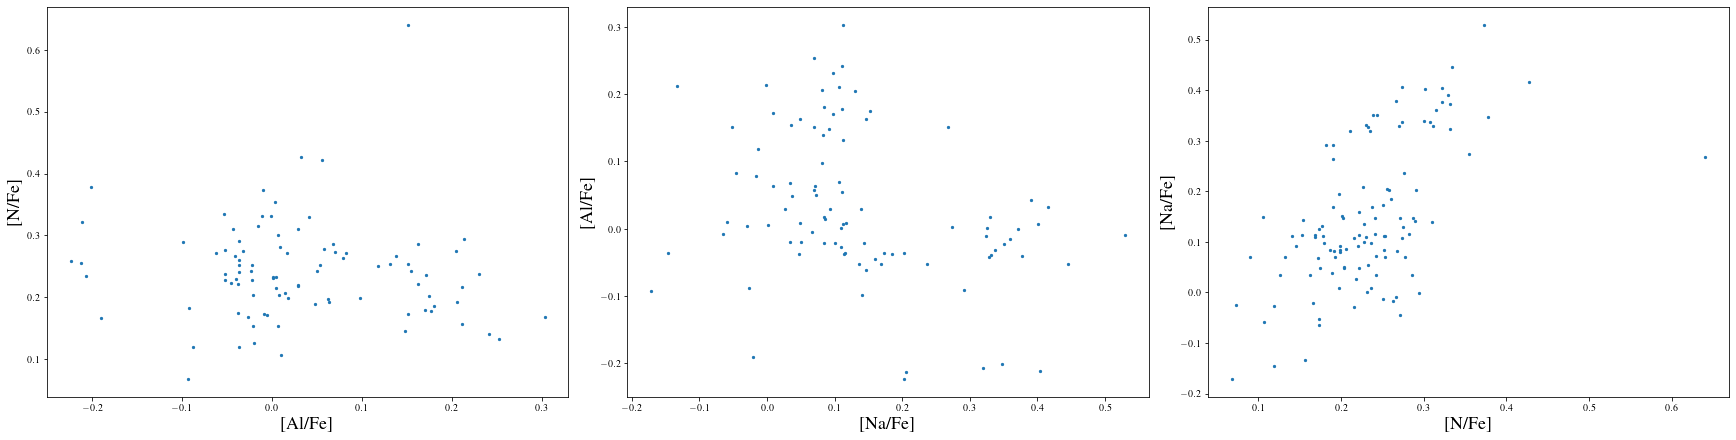

In [182]:
fig = plt.figure(constrained_layout=True,figsize=(24,6))

plt.subplot(1,3,1)
plt.scatter(data['AL_FE'][mask_knot],data['N_FE'][mask_knot],s=5)
# plt.xlim(-0.15,0.3)
# plt.ylim(-0.1,0.7)
plt.xlabel('[Al/Fe]',fontsize=18)
plt.ylabel('[N/Fe]',fontsize=18)

plt.subplot(1,3,2)
plt.scatter(data['NA_FE'][mask_knot],data['AL_FE'][mask_knot],s=5)
# plt.xlim(-0.15,0.3)
# plt.ylim(-0.1,0.7)
plt.xlabel('[Na/Fe]',fontsize=18)
plt.ylabel('[Al/Fe]',fontsize=18)

plt.subplot(1,3,3)
plt.scatter(data['N_FE'][mask_knot],data['NA_FE'][mask_knot],s=5)
# plt.xlim(-0.15,0.3)
# plt.ylim(-0.1,0.7)
plt.xlabel('[N/Fe]',fontsize=18)
plt.ylabel('[Na/Fe]',fontsize=18)


# $Gaia$ CMDs

In [163]:
# m - M = 5log10(d)-5 where d is in pc
dist = data['weighted_dist']

In [178]:
g = data['phot_g_mean_mag']
bprp = data['bp_rp']

mags = g-(5*np.log10(dist))+5 

(16.0, -5.0)

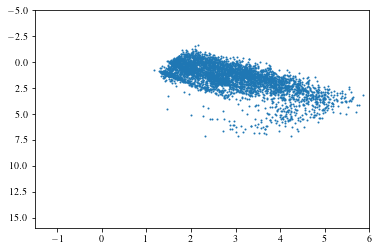

In [181]:
plt.scatter(bprp,mags,s=1)
plt.xlim(-1.5,6)
plt.ylim(16,-5)

# way too extincted